In [1]:
import sys
import os
from typing import Dict
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from src.data.data_loader import YahooDataLoader
from config.settings import DataConfig

plt.rcParams['figure.figsize'] = (18, 12)

# Data Preparation

In [2]:
symbol = "SPY"
timeframe = "1h"

data_config = DataConfig(
    timeframes=[timeframe],
    symbols=[symbol],
    cache_enabled=True,
    cache_dir="../data/cache"
)

data_loader = YahooDataLoader(data_config)

end_date = datetime.now()
start_date = end_date - timedelta(days=365 * 1)

print(f"Loading price data for {symbol} from {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

Loading price data for SPY from 2024-09-21 to 2025-09-21


In [3]:
spy_prices_df = data_loader.load_data(
    symbol=symbol,
    start_date=start_date,
    end_date=end_date,
    timeframe=timeframe
)

print(f"Successfully loaded {len(spy_prices_df)} rows of {timeframe} data for {symbol}")
print(f"Date range: {spy_prices_df.index.min()} to {spy_prices_df.index.max()}")
print(f"\nData shape: {spy_prices_df.shape}")
print(f"\nColumns: {list(spy_prices_df.columns)}")

Successfully loaded 1731 rows of 1h data for SPY
Date range: 2024-09-23 09:30:00-04:00 to 2025-09-19 15:30:00-04:00

Data shape: (1731, 8)

Columns: ['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits', 'capital gains']


In [4]:
spy_prices_df.head()

,open,high,low,close,volume,dividends,stock splits,capital gains
Datetime,,,,,,,,
2024-09-23 09:30:00-04:00,569.070007,570.332520,568.250000,569.789978,6921524,0.0,0.0,0.0
2024-09-23 10:30:00-04:00,569.799988,570.090027,568.729980,569.734985,3465602,0.0,0.0,0.0
2024-09-23 11:30:00-04:00,569.739990,570.150024,568.359985,568.940002,2894440,0.0,0.0,0.0
2024-09-23 12:30:00-04:00,568.940002,569.200012,568.099976,568.779907,3918975,0.0,0.0,0.0
2024-09-23 13:30:00-04:00,568.809998,569.500000,568.580017,569.239990,2458458,0.0,0.0,0.0


In [5]:
spy_prices_df.describe()

,open,high,low,close,volume,dividends,stock splits,capital gains
count,1731.000000,1731.000000,1731.000000,1731.000000,1.731000e+03,1731.000000,1731.0,1731.0
mean,595.035980,596.204652,593.860247,595.060591,7.760841e+06,0.004191,0.0,0.0
std,31.534590,30.945747,31.947976,31.514744,5.345244e+06,0.087234,0.0,0.0
min,489.190002,497.589996,481.799988,493.790009,1.422477e+06,0.000000,0.0,0.0
25%,575.535004,576.584961,574.407501,575.689941,4.493004e+06,0.000000,0.0,0.0
50%,595.450012,596.369995,593.770020,595.139893,6.559021e+06,0.000000,0.0,0.0
75%,609.880005,610.313721,609.315002,609.864899,9.536440e+06,0.000000,0.0,0.0
max,664.380005,664.890015,663.385010,664.400024,9.226401e+07,1.966000,0.0,0.0


In [6]:
spy_returns_df = pd.DataFrame(index=spy_prices_df.index)

spy_returns_df['open_return'] = spy_prices_df['open'].pct_change() * 100
spy_returns_df['high_return'] = spy_prices_df['high'].pct_change() * 100
spy_returns_df['low_return'] = spy_prices_df['low'].pct_change() * 100
spy_returns_df['close_return'] = spy_prices_df['close'].pct_change() * 100

spy_returns_df['intrabar_return'] = ((spy_prices_df['high'] - spy_prices_df['low']) / spy_prices_df['open']) * 100

spy_returns_df['body_return'] = ((spy_prices_df['close'] - spy_prices_df['open']) / spy_prices_df['open']) * 100

spy_returns_df = spy_returns_df.dropna()

print(f"Returns data shape: {spy_returns_df.shape}")

Returns data shape: (1730, 6)


In [7]:
spy_returns_df.head()

,open_return,high_return,low_return,close_return,intrabar_return,body_return
Datetime,,,,,,
2024-09-23 10:30:00-04:00,0.128276,-0.042518,0.084466,-0.009651,0.238688,-0.011408
2024-09-23 11:30:00-04:00,-0.010530,0.010524,-0.065056,-0.139536,0.314185,-0.140413
2024-09-23 12:30:00-04:00,-0.140413,-0.166625,-0.045747,-0.028139,0.193348,-0.028139
2024-09-23 13:30:00-04:00,-0.022850,0.052703,0.084499,0.080889,0.161738,0.075595
2024-09-23 14:30:00-04:00,0.082634,0.015808,0.083086,0.047435,0.094435,0.040398


In [8]:
spy_returns_df.describe()

,open_return,high_return,low_return,close_return,intrabar_return,body_return
count,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000,1730.000000
mean,0.009867,0.009614,0.009915,0.009737,0.404985,0.004841
std,0.442439,0.395493,0.439448,0.430477,0.416843,0.332425
min,-4.179969,-3.126474,-4.605395,-3.971065,0.063532,-2.271798
25%,-0.122690,-0.094494,-0.109064,-0.114161,0.193020,-0.112957
50%,0.016509,0.004888,0.018520,0.010408,0.292200,0.007978
75%,0.153793,0.110281,0.148037,0.139942,0.486187,0.128565
max,4.974061,6.562788,4.873161,4.947324,8.456836,4.962042


## Prices Analysis

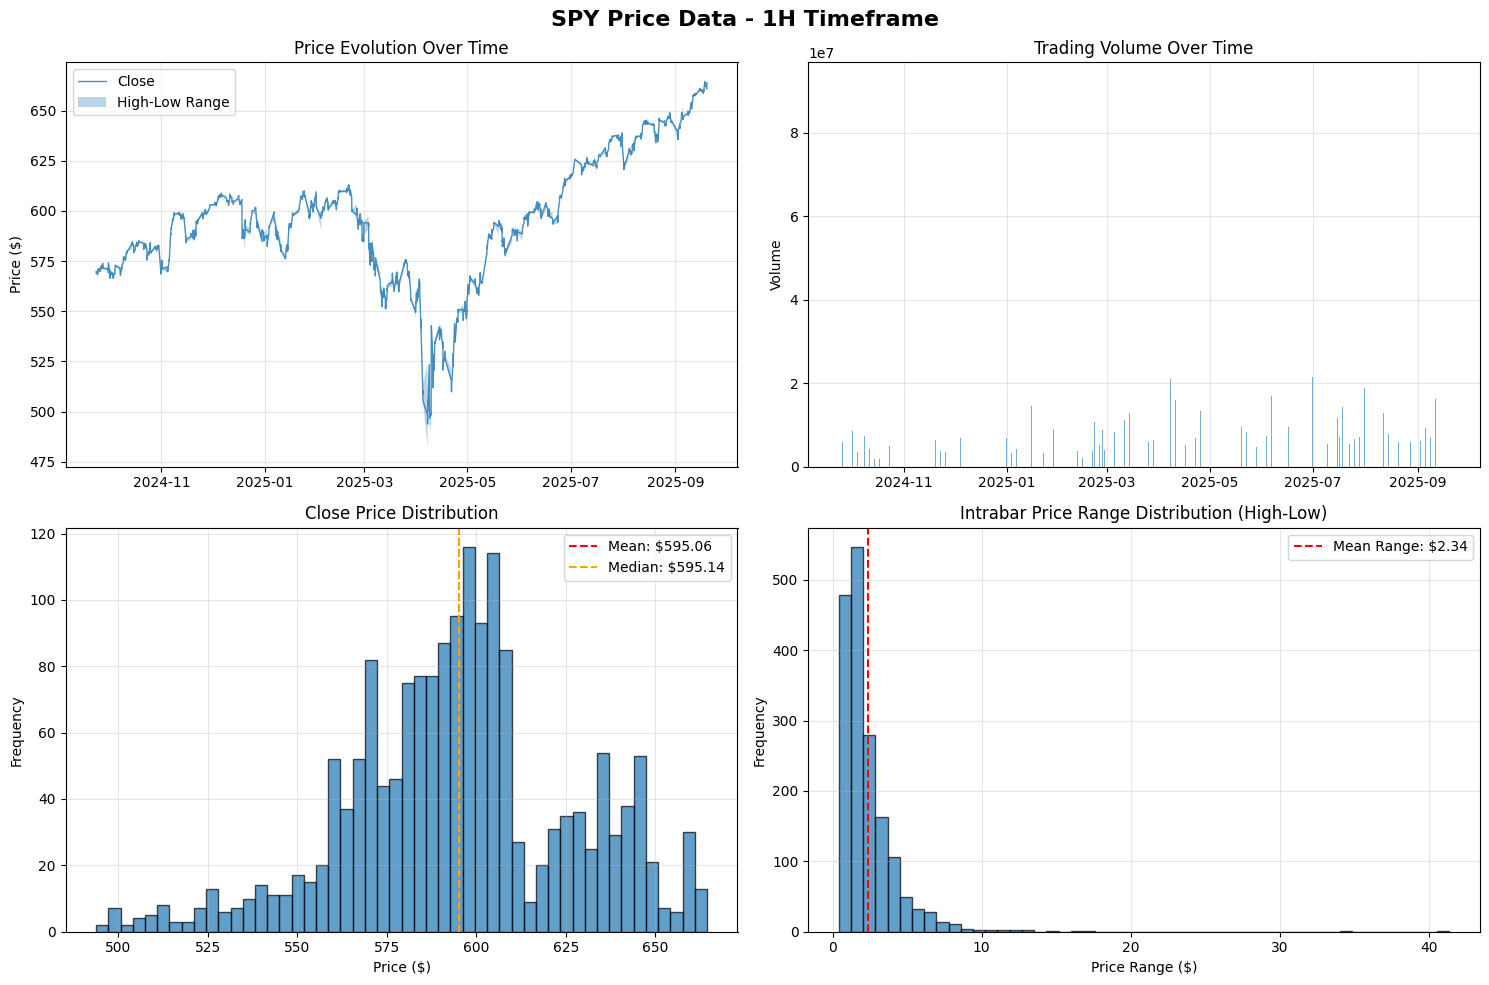

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{symbol} Price Data - 1H Timeframe', fontsize=16, fontweight='bold')

axes[0, 0].plot(spy_prices_df.index, spy_prices_df['close'], label='Close', alpha=0.8, linewidth=1)
axes[0, 0].fill_between(spy_prices_df.index, spy_prices_df['low'], spy_prices_df['high'], 
                       alpha=0.3, label='High-Low Range')
axes[0, 0].set_title('Price Evolution Over Time')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(spy_prices_df.index, spy_prices_df['volume'], alpha=0.6, width=0.02)
axes[0, 1].set_title('Trading Volume Over Time')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(spy_prices_df['close'], bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].axvline(spy_prices_df['close'].mean(), color='red', linestyle='--', 
                  label=f'Mean: ${spy_prices_df["close"].mean():.2f}')
axes[1, 0].axvline(spy_prices_df['close'].median(), color='orange', linestyle='--', 
                  label=f'Median: ${spy_prices_df["close"].median():.2f}')
axes[1, 0].set_title('Close Price Distribution')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

price_range = spy_prices_df['high'] - spy_prices_df['low']
axes[1, 1].hist(price_range, bins=50, alpha=0.7, edgecolor='black')
axes[1, 1].axvline(price_range.mean(), color='red', linestyle='--', 
                  label=f'Mean Range: ${price_range.mean():.2f}')
axes[1, 1].set_title('Intrabar Price Range Distribution (High-Low)')
axes[1, 1].set_xlabel('Price Range ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
print(f"Price Statistics for {symbol}:")
print(f"Close Price - Mean: ${spy_prices_df['close'].mean():.2f}, Std: ${spy_prices_df['close'].std():.2f}")
print(f"Price Range - Mean: ${price_range.mean():.2f}, Std: ${price_range.std():.2f}")
print(f"Volume - Mean: {spy_prices_df['volume'].mean():,.0f}, Std: {spy_prices_df['volume'].std():,.0f}")

Price Statistics for SPY:
Close Price - Mean: $595.06, Std: $31.51
Price Range - Mean: $2.34, Std: $2.17
Volume - Mean: 7,760,841, Std: 5,345,244


## Returns Analysis

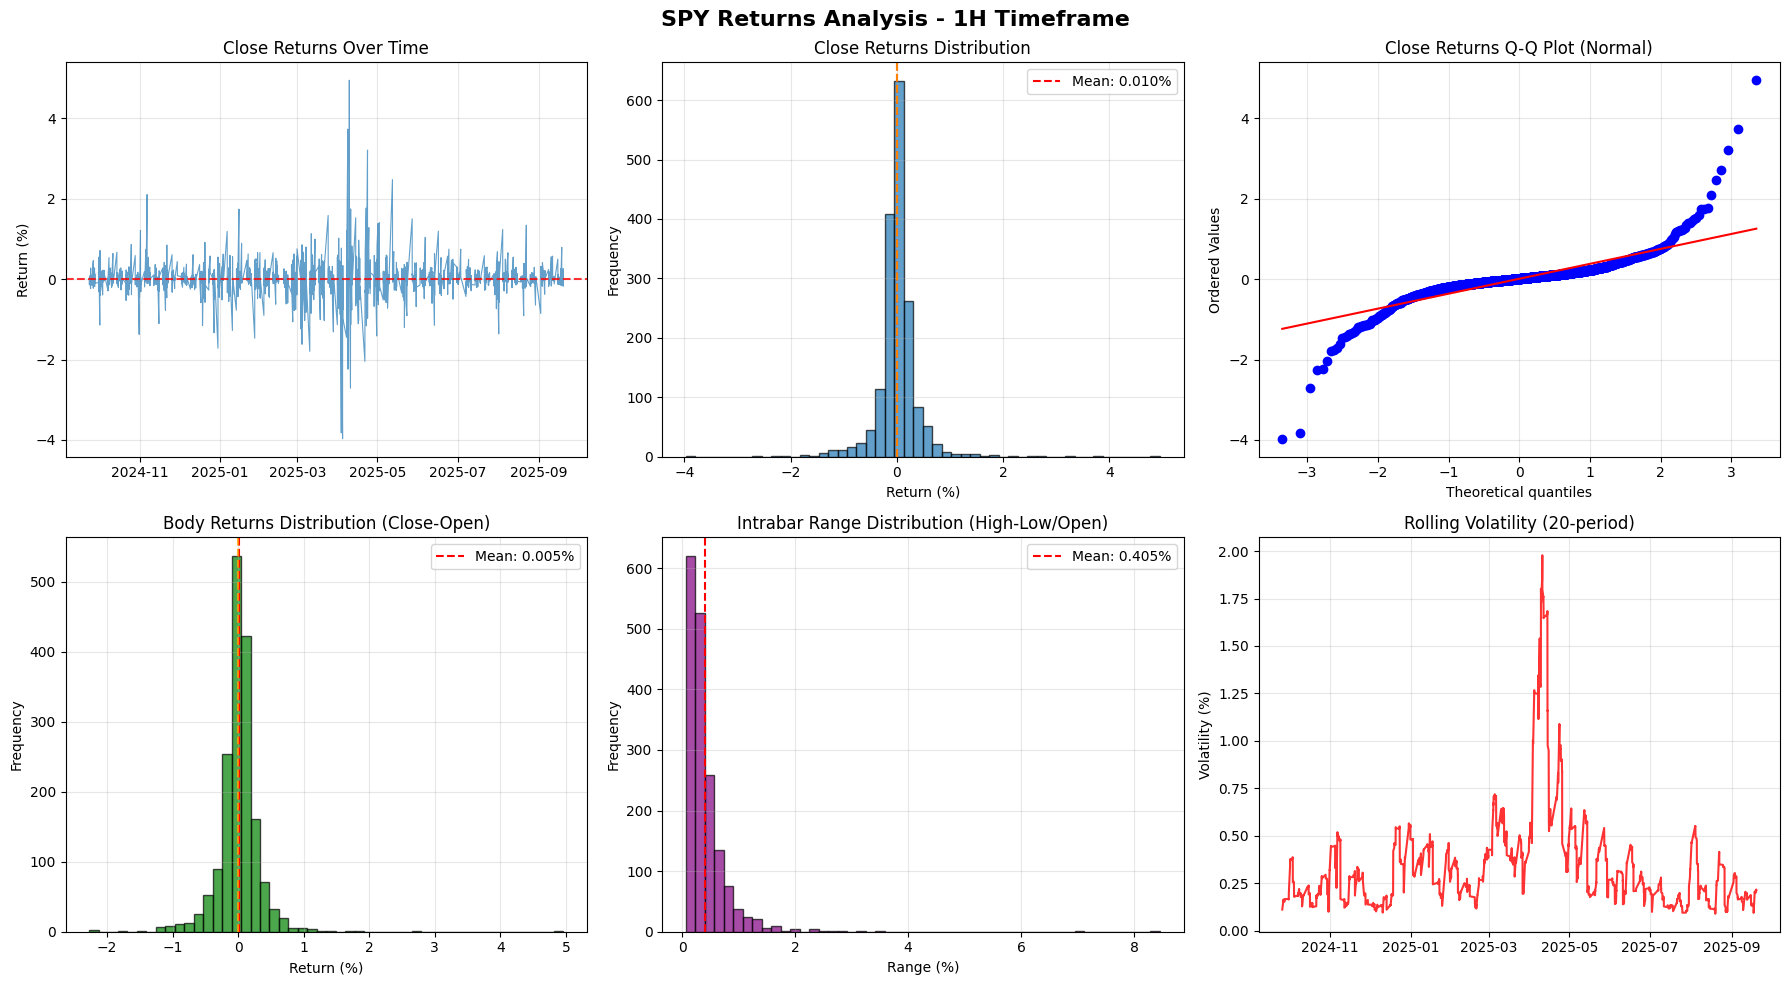

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'{symbol} Returns Analysis - 1H Timeframe', fontsize=16, fontweight='bold')

axes[0, 0].plot(spy_returns_df.index, spy_returns_df['close_return'], alpha=0.7, linewidth=0.8)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[0, 0].set_title('Close Returns Over Time')
axes[0, 0].set_ylabel('Return (%)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(spy_returns_df['close_return'], bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].axvline(spy_returns_df['close_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["close_return"].mean():.3f}%')
axes[0, 1].axvline(0, color='orange', linestyle='--', alpha=0.8)
axes[0, 1].set_title('Close Returns Distribution')
axes[0, 1].set_xlabel('Return (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

from scipy import stats
stats.probplot(spy_returns_df['close_return'].dropna(), dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Close Returns Q-Q Plot (Normal)')
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].hist(spy_returns_df['body_return'], bins=50, alpha=0.7, edgecolor='black', color='green')
axes[1, 0].axvline(spy_returns_df['body_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["body_return"].mean():.3f}%')
axes[1, 0].axvline(0, color='orange', linestyle='--', alpha=0.8)
axes[1, 0].set_title('Body Returns Distribution (Close-Open)')
axes[1, 0].set_xlabel('Return (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(spy_returns_df['intrabar_return'], bins=50, alpha=0.7, edgecolor='black', color='purple')
axes[1, 1].axvline(spy_returns_df['intrabar_return'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {spy_returns_df["intrabar_return"].mean():.3f}%')
axes[1, 1].set_title('Intrabar Range Distribution (High-Low/Open)')
axes[1, 1].set_xlabel('Range (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

rolling_vol = spy_returns_df['close_return'].rolling(window=20).std()
axes[1, 2].plot(rolling_vol.index, rolling_vol, alpha=0.8, color='red')
axes[1, 2].set_title('Rolling Volatility (20-period)')
axes[1, 2].set_ylabel('Volatility (%)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
close_returns = spy_returns_df['close_return']
body_returns = spy_returns_df['body_return']
intrabar_returns = spy_returns_df['intrabar_return']

In [13]:
print(f"1. CLOSE RETURNS STATISTICS:")
print(f"   Mean Return: {close_returns.mean():.4f}%")
print(f"   Std Deviation: {close_returns.std():.4f}%")
print(f"   Skewness: {close_returns.skew():.4f}")
print(f"   Kurtosis: {close_returns.kurtosis():.4f}")
print(f"   Min Return: {close_returns.min():.4f}%")
print(f"   Max Return: {close_returns.max():.4f}%")
print(f"   Sharpe Ratio (assuming 252*24 periods/year): {(close_returns.mean() / close_returns.std()) * np.sqrt(252*24):.4f}")

1. CLOSE RETURNS STATISTICS:
   Mean Return: 0.0097%
   Std Deviation: 0.4305%
   Skewness: 0.4428
   Kurtosis: 27.5033
   Min Return: -3.9711%
   Max Return: 4.9473%
   Sharpe Ratio (assuming 252*24 periods/year): 1.7591


In [14]:
print(f"2. BODY RETURNS STATISTICS (Close-Open):")
print(f"   Mean Return: {body_returns.mean():.4f}%")
print(f"   Std Deviation: {body_returns.std():.4f}%")
print(f"   Skewness: {body_returns.skew():.4f}")
print(f"   Kurtosis: {body_returns.kurtosis():.4f}")

2. BODY RETURNS STATISTICS (Close-Open):
   Mean Return: 0.0048%
   Std Deviation: 0.3324%
   Skewness: 1.7445
   Kurtosis: 35.8834


In [15]:
print(f"3. INTRABAR RANGE STATISTICS (High-Low/Open):")
print(f"   Mean Range: {intrabar_returns.mean():.4f}%")
print(f"   Std Deviation: {intrabar_returns.std():.4f}%")
print(f"   Min Range: {intrabar_returns.min():.4f}%")
print(f"   Max Range: {intrabar_returns.max():.4f}%")

3. INTRABAR RANGE STATISTICS (High-Low/Open):
   Mean Range: 0.4050%
   Std Deviation: 0.4168%
   Min Range: 0.0635%
   Max Range: 8.4568%


In [16]:
print(f"4. RISK METRICS:")
print(f"   Value at Risk (1%): {np.percentile(close_returns, 1):.4f}%")
print(f"   Value at Risk (5%): {np.percentile(close_returns, 5):.4f}%")
print(f"   Expected Shortfall (1%): {close_returns[close_returns <= np.percentile(close_returns, 1)].mean():.4f}%")
print(f"   Expected Shortfall (5%): {close_returns[close_returns <= np.percentile(close_returns, 5)].mean():.4f}%")

4. RISK METRICS:
   Value at Risk (1%): -1.2660%
   Value at Risk (5%): -0.5173%
   Expected Shortfall (1%): -1.9411%
   Expected Shortfall (5%): -1.0546%


In [17]:
print(f"5. DISTRIBUTION ANALYSIS:")
positive_returns = (close_returns > 0).sum()
negative_returns = (close_returns < 0).sum()
zero_returns = (close_returns == 0).sum()
total_returns = len(close_returns)

print(f"   Positive Returns: {positive_returns} ({positive_returns/total_returns*100:.1f}%)")
print(f"   Negative Returns: {negative_returns} ({negative_returns/total_returns*100:.1f}%)")
print(f"   Zero Returns: {zero_returns} ({zero_returns/total_returns*100:.1f}%)")
print(f"   Win Rate: {positive_returns/(positive_returns+negative_returns)*100:.1f}%")

if positive_returns > 0 and negative_returns > 0:
    avg_win = close_returns[close_returns > 0].mean()
    avg_loss = close_returns[close_returns < 0].mean()
    profit_factor = abs(avg_win / avg_loss)
    print(f"   Average Win: {avg_win:.4f}%")
    print(f"   Average Loss: {avg_loss:.4f}%")
    print(f"   Profit Factor: {profit_factor:.4f}")

5. DISTRIBUTION ANALYSIS:
   Positive Returns: 909 (52.5%)
   Negative Returns: 817 (47.2%)
   Zero Returns: 4 (0.2%)
   Win Rate: 52.7%
   Average Win: 0.2343%
   Average Loss: -0.2401%
   Profit Factor: 0.9760


# Regime Detection

In [18]:
from src.regime_detection.hmm import GaussianMixtureRegimeDetector

We identify three market regimes:
- Bullish breakout: Strong upward momentum with high volatility
- Bearish breakout: Strong downward momentum with high volatility
- Trading range: Low volatility sideways movement

In [19]:
regime_detector = GaussianMixtureRegimeDetector(n_states=3, random_state=13)

In [20]:
hmm_features = regime_detector.prepare_features(spy_prices_df)

print(f"Feature matrix shape: {hmm_features.shape}")
print(f"Features include: returns, volatility, volume ratios, price ratios, RSI, momentum")
print(f"Training period: {len(hmm_features)} observations")

Feature matrix shape: (1711, 9)
Features include: returns, volatility, volume ratios, price ratios, RSI, momentum
Training period: 1711 observations


In [21]:
regime_detector.fit(hmm_features)
regime_characteristics = regime_detector.get_regime_characteristics()

print("\nRegime Characteristics:")
for regime_id, characteristics in regime_characteristics.items():
    print(f"\n{regime_id.upper()}:")
    print(f"  Weight: {characteristics['weight']:.3f}")
    print(f"  Mean Return: {characteristics['features']['returns']:.4f}")
    print(f"  Volatility: {characteristics['features']['volatility']:.4f}")
    print(f"  Volume Ratio: {characteristics['features']['volume_ratio']:.3f}")
    print(f"  RSI: {characteristics['features']['rsi']:.1f}")
    print(f"  Momentum: {characteristics['features']['momentum']:.4f}")


Regime Characteristics:

REGIME_0:
  Weight: 0.175
  Mean Return: 0.0031
  Volatility: 0.0037
  Volume Ratio: 1.350
  RSI: 56.1
  Momentum: 0.0036

REGIME_1:
  Weight: 0.073
  Mean Return: -0.0064
  Volatility: 0.0083
  Volume Ratio: 1.519
  RSI: 40.4
  Momentum: -0.0094

REGIME_2:
  Weight: 0.752
  Mean Return: 0.0000
  Volatility: 0.0029
  Volume Ratio: 0.890
  RSI: 55.8
  Momentum: 0.0014


In [22]:
regime_predictions = regime_detector.predict_regime(hmm_features)
regime_probabilities = regime_detector.get_regime_probabilities(hmm_features)

print(f"Predicted {len(regime_predictions)} regime states")

regime_start_idx = len(spy_prices_df) - len(regime_predictions)
regime_df = pd.DataFrame(index=spy_prices_df.index[regime_start_idx:])
regime_df['regime_state'] = regime_predictions
regime_df['regime_prob_0'] = regime_probabilities[:, 0]
regime_df['regime_prob_1'] = regime_probabilities[:, 1]
regime_df['regime_prob_2'] = regime_probabilities[:, 2]

print("\nRegime distribution:")
regime_counts = pd.Series(regime_predictions).value_counts().sort_index()
for state, count in regime_counts.items():
    pct = count / len(regime_predictions) * 100
    print(f"  Regime {state}: {count} observations ({pct:.1f}%)")

Predicted 1711 regime states

Regime distribution:
  Regime 0: 296 observations (17.3%)
  Regime 1: 124 observations (7.2%)
  Regime 2: 1291 observations (75.5%)


In [23]:
def map_regimes_to_labels(characteristics):
    regime_labels = {}

    for regime_id, props in characteristics.items():
        features = props['features']
        returns = features['returns']
        volatility = features['volatility']
        momentum = features['momentum']

        if volatility > 0.015 and returns > 0.003 and momentum > 0.01:
            label = "bullish_breakout"
        elif volatility > 0.015 and returns < -0.003 and momentum < -0.01:
            label = "bearish_breakout"
        elif volatility < 0.012 and abs(returns) < 0.002:
            label = "trading_range"
        elif returns > 0:
            label = "bullish_trend"
        else:
            label = "bearish_trend"

        regime_labels[regime_id] = label

    return regime_labels

regime_labels = map_regimes_to_labels(regime_characteristics)
print("\nRegime Label Mapping:")
for regime_id, label in regime_labels.items():
    print(f"  {regime_id} -> {label}")

state_to_label = {i: regime_labels[f'regime_{i}'] for i in range(3)}
regime_df['regime_label'] = regime_df['regime_state'].map(state_to_label)

print("\nRegime distribution by label:")
label_counts = regime_df['regime_label'].value_counts()
for label, count in label_counts.items():
    pct = count / len(regime_df) * 100
    print(f"  {label}: {count} observations ({pct:.1f}%)")


Regime Label Mapping:
  regime_0 -> bullish_trend
  regime_1 -> bearish_trend
  regime_2 -> trading_range

Regime distribution by label:
  trading_range: 1291 observations (75.5%)
  bullish_trend: 296 observations (17.3%)
  bearish_trend: 124 observations (7.2%)


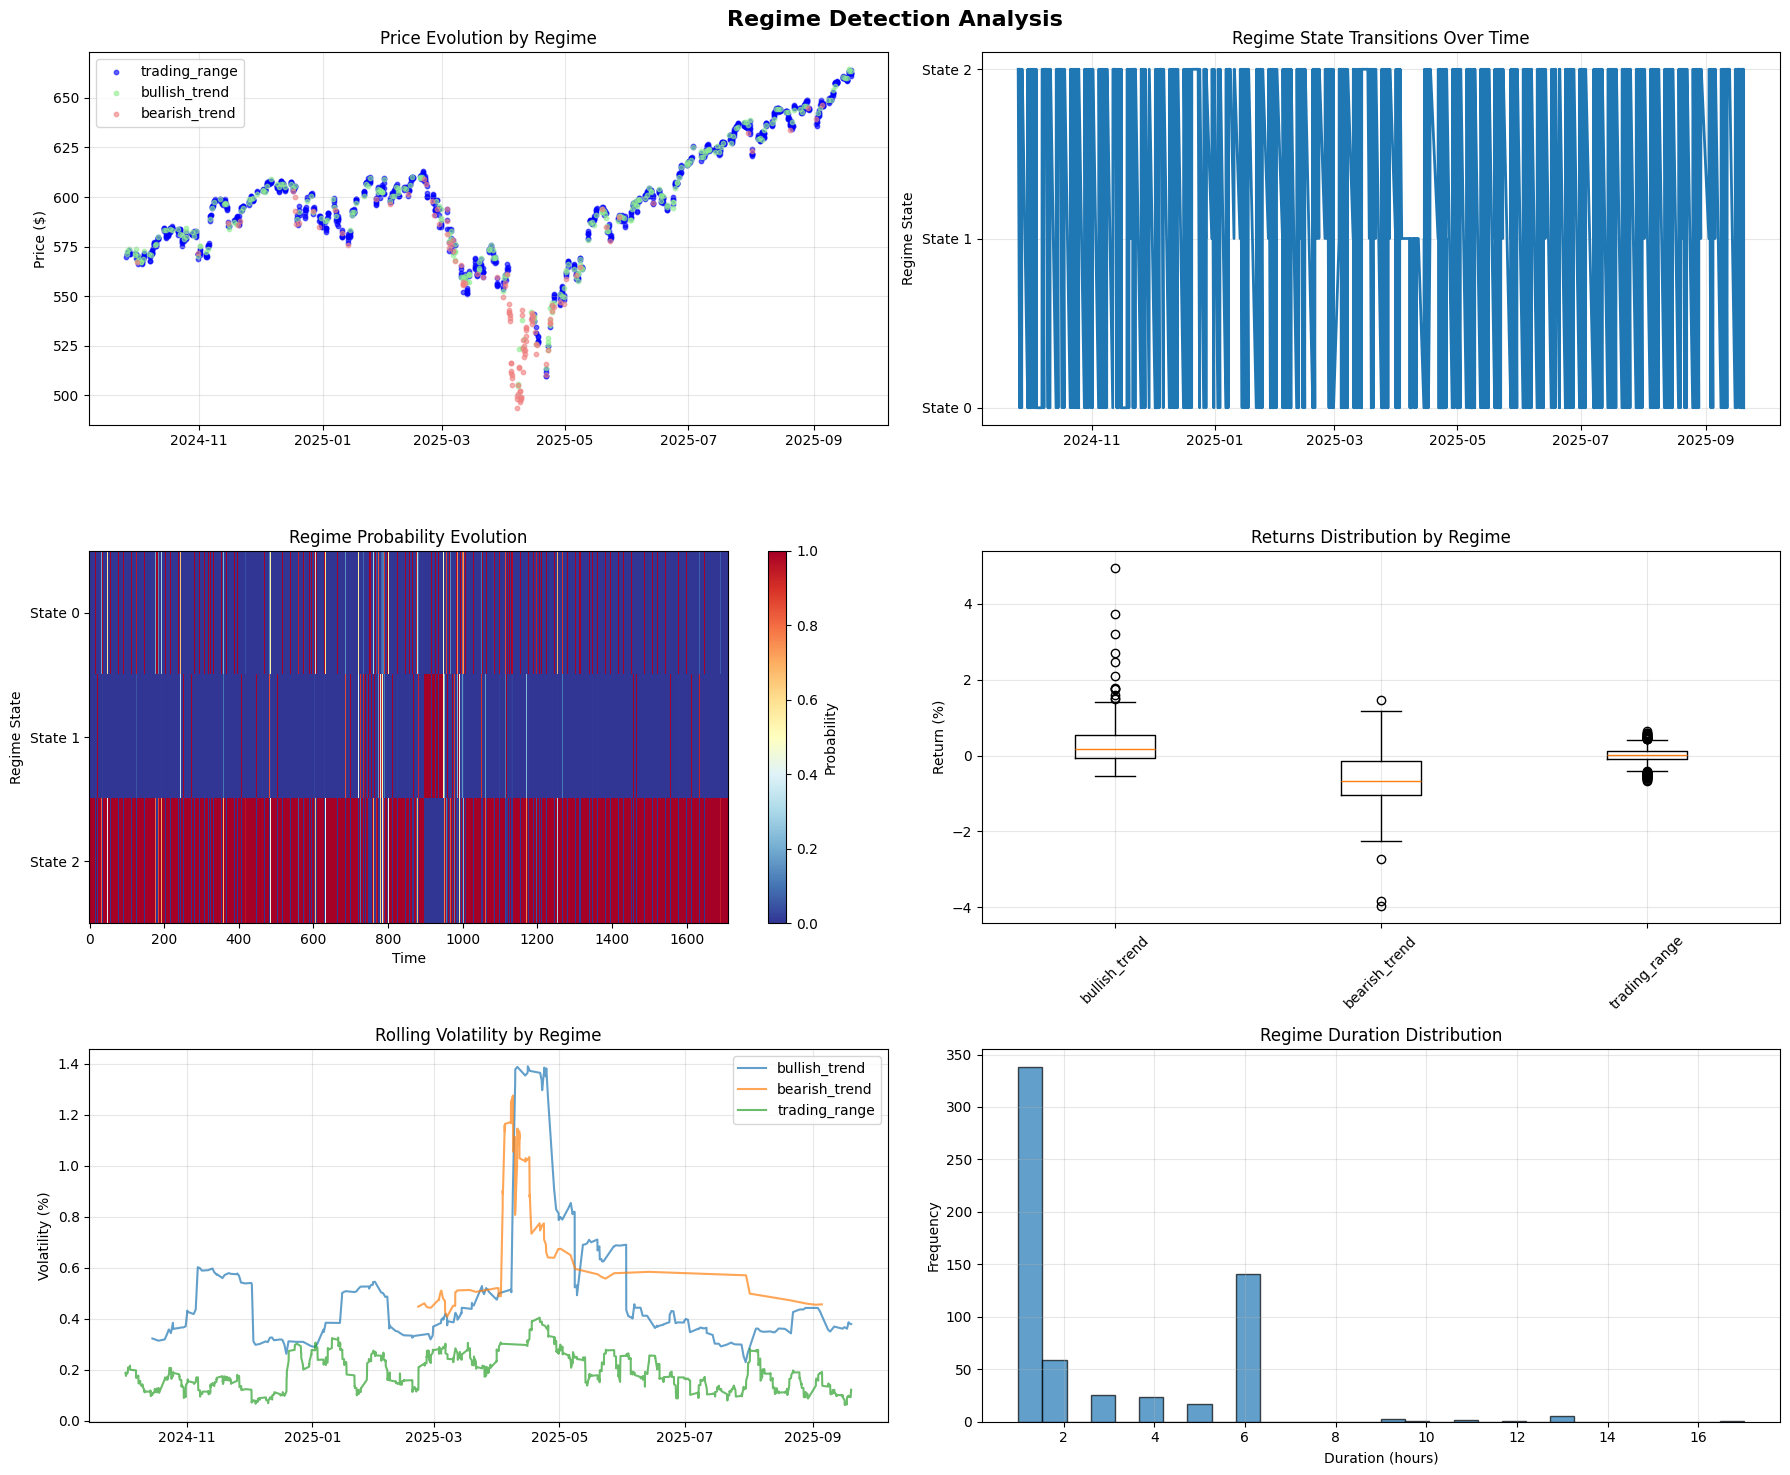

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Regime Detection Analysis', fontsize=16, fontweight='bold')

ax = axes[0, 0]
regime_colors = {'bullish_breakout': 'green', 'bearish_breakout': 'red', 'trading_range': 'blue',
                'bullish_trend': 'lightgreen', 'bearish_trend': 'lightcoral'}

price_regime_df = spy_prices_df.iloc[regime_start_idx:].copy()
price_regime_df['regime_label'] = regime_df['regime_label']

for label, color in regime_colors.items():
    mask = price_regime_df['regime_label'] == label
    if mask.any():
        ax.scatter(price_regime_df[mask].index, price_regime_df[mask]['close'],
                  c=color, label=label, alpha=0.6, s=10)

ax.set_title('Price Evolution by Regime')
ax.set_ylabel('Price ($)')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
ax.plot(regime_df.index, regime_df['regime_state'], linewidth=2)
ax.set_title('Regime State Transitions Over Time')
ax.set_ylabel('Regime State')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['State 0', 'State 1', 'State 2'])
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
prob_matrix = regime_df[['regime_prob_0', 'regime_prob_1', 'regime_prob_2']].values.T
im = ax.imshow(prob_matrix, aspect='auto', cmap='RdYlBu_r', interpolation='nearest')
ax.set_title('Regime Probability Evolution')
ax.set_ylabel('Regime State')
ax.set_xlabel('Time')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['State 0', 'State 1', 'State 2'])
plt.colorbar(im, ax=ax, label='Probability')

ax = axes[1, 1]
returns_regime_df = spy_returns_df.iloc[regime_start_idx:].copy()
returns_regime_df['regime_label'] = regime_df['regime_label']

regime_returns = []
regime_names = []
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_returns.append(returns_regime_df[returns_regime_df['regime_label'] == label]['close_return'].values)
        regime_names.append(label)

ax.boxplot(regime_returns, labels=regime_names)
ax.set_title('Returns Distribution by Regime')
ax.set_ylabel('Return (%)')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

ax = axes[2, 0]
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_data = returns_regime_df[returns_regime_df['regime_label'] == label]
        rolling_vol = regime_data['close_return'].rolling(window=20).std()
        ax.plot(regime_data.index, rolling_vol, label=label, alpha=0.7)

ax.set_title('Rolling Volatility by Regime')
ax.set_ylabel('Volatility (%)')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 1]
regime_changes = regime_df['regime_state'].diff().fillna(0) != 0
regime_durations = []
current_regime = regime_df['regime_state'].iloc[0]
duration = 1

for i in range(1, len(regime_df)):
    if regime_df['regime_state'].iloc[i] == current_regime:
        duration += 1
    else:
        regime_durations.append(duration)
        current_regime = regime_df['regime_state'].iloc[i]
        duration = 1
regime_durations.append(duration)

ax.hist(regime_durations, bins=30, alpha=0.7, edgecolor='black')
ax.set_title('Regime Duration Distribution')
ax.set_xlabel('Duration (hours)')
ax.set_ylabel('Frequency')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
for label in regime_labels.values():
    if label in returns_regime_df['regime_label'].values:
        regime_data = returns_regime_df[returns_regime_df['regime_label'] == label]

        if len(regime_data) > 0:
            print(f"\n{label.upper().replace('_', ' ')}:")
            print(f"  Observations: {len(regime_data)}")
            print(f"  Mean Return: {regime_data['close_return'].mean():.4f}%")
            print(f"  Std Deviation: {regime_data['close_return'].std():.4f}%")
            print(f"  Skewness: {regime_data['close_return'].skew():.4f}")
            print(f"  Win Rate: {(regime_data['close_return'] > 0).mean()*100:.1f}%")

            if len(regime_data) > 1:
                sharpe = (regime_data['close_return'].mean() / regime_data['close_return'].std()) * np.sqrt(252*24)
                print(f"  Sharpe Ratio: {sharpe:.4f}")

print(f"\nMean regime duration: {np.mean(regime_durations):.1f} hours")
print(f"Median regime duration: {np.median(regime_durations):.1f} hours")
print(f"Max regime duration: {np.max(regime_durations)} hours")


BULLISH TREND:
  Observations: 296
  Mean Return: 0.3115%
  Std Deviation: 0.6129%
  Skewness: 3.0850
  Win Rate: 67.2%
  Sharpe Ratio: 39.5302

BEARISH TREND:
  Observations: 124
  Mean Return: -0.6431%
  Std Deviation: 0.8164%
  Skewness: -0.8734
  Win Rate: 21.0%
  Sharpe Ratio: -61.2627

TRADING RANGE:
  Observations: 1290
  Mean Return: 0.0034%
  Std Deviation: 0.1920%
  Skewness: -0.2277
  Win Rate: 52.2%
  Sharpe Ratio: 1.3625

Mean regime duration: 2.8 hours
Median regime duration: 1.0 hours
Max regime duration: 17 hours


# Support and Resistance Detection

The system identifies key levels that bound the trading ranges and validates them with volume analysis.

In [26]:
from src.indicators.technical import PivotPointIndicator

In [27]:
pivot_detector = PivotPointIndicator(window=20, min_strength=2)

In [28]:
sr_data = pivot_detector.calculate(spy_prices_df)

print(f"Calculated pivot points for {len(sr_data)} price observations")
print(f"Pivot highs detected: {sr_data['pivot_high'].notna().sum()}")
print(f"Pivot lows detected: {sr_data['pivot_low'].notna().sum()}")

recent_data = sr_data.tail(10)
print(f"\nRecent Support/Resistance Levels:")
print(f"Dynamic Support: ${recent_data['dynamic_support'].iloc[-1]:.2f}")
print(f"Dynamic Resistance: ${recent_data['dynamic_resistance'].iloc[-1]:.2f}")
print(f"Range Width: {recent_data['range_width'].iloc[-1]:.1%}")
print(f"Current Range Position: {recent_data['range_position'].iloc[-1]:.1%}")

Calculated pivot points for 1731 price observations
Pivot highs detected: 80
Pivot lows detected: 88

Recent Support/Resistance Levels:
Dynamic Support: $644.61
Dynamic Resistance: $664.89
Range Width: 3.1%
Current Range Position: 93.7%


In [29]:
if len(regime_df) > 0:
    sr_regime_df = sr_data.iloc[regime_start_idx:].copy()
    sr_regime_df['regime_label'] = regime_df['regime_label']

    trading_range_periods = sr_regime_df[sr_regime_df['regime_label'] == 'trading_range']

    print(f"Trading Range Analysis:")
    print(f"Trading range periods: {len(trading_range_periods)} observations")

    if len(trading_range_periods) > 0:
        print(f"Average range width in trading ranges: {trading_range_periods['range_width'].mean():.1%}")
        print(f"Average range position distribution: {trading_range_periods['range_position'].mean():.1%}")

        range_quality = pivot_detector.get_range_quality(spy_prices_df.iloc[regime_start_idx:])
        trading_range_quality = range_quality[sr_regime_df['regime_label'] == 'trading_range']

        print(f"Average range quality score: {trading_range_quality.mean():.3f}")
        print(f"High quality ranges (>0.7): {(trading_range_quality > 0.7).sum()} periods")
else:
    print("No regime data available for support/resistance validation")

Trading Range Analysis:
Trading range periods: 1291 observations
Average range width in trading ranges: 2.5%
Average range position distribution: 67.6%
Average range quality score: 0.745
High quality ranges (>0.7): 760 periods


In [30]:
def validate_sr_levels_with_volume(price_data, sr_data, volume_threshold_multiplier=1.5):

    validated_sr = sr_data.copy()

    volume_ma = price_data['volume'].rolling(window=20).mean()
    high_volume_threshold = volume_ma * volume_threshold_multiplier

    support_tests = []
    resistance_tests = []

    for i in range(20, len(price_data)):
        current_support = sr_data['dynamic_support'].iloc[i]
        current_resistance = sr_data['dynamic_resistance'].iloc[i]

        recent_data = price_data.iloc[i-5:i+1]
        support_distance = abs(recent_data['low'] - current_support) / current_support
        support_test = (support_distance < 0.01) & (recent_data['volume'] > high_volume_threshold.iloc[i-5:i+1])

        resistance_distance = abs(recent_data['high'] - current_resistance) / current_resistance
        resistance_test = (resistance_distance < 0.01) & (recent_data['volume'] > high_volume_threshold.iloc[i-5:i+1])

        support_tests.append(support_test.any())
        resistance_tests.append(resistance_test.any())

    validated_sr['support_volume_validated'] = [False] * 20 + support_tests
    validated_sr['resistance_volume_validated'] = [False] * 20 + resistance_tests

    validated_sr['sr_validation_score'] = (
        validated_sr['support_volume_validated'].astype(int) +
        validated_sr['resistance_volume_validated'].astype(int)
    ) / 2

    return validated_sr

print("Validating support/resistance levels with volume analysis...")
validated_sr_data = validate_sr_levels_with_volume(spy_prices_df, sr_data)

support_validated = validated_sr_data['support_volume_validated'].sum()
resistance_validated = validated_sr_data['resistance_volume_validated'].sum()
total_observations = len(validated_sr_data) - 20

print(f"Volume validation results:")
print(f"Support levels validated by volume: {support_validated}/{total_observations} ({support_validated/total_observations*100:.1f}%)")
print(f"Resistance levels validated by volume: {resistance_validated}/{total_observations} ({resistance_validated/total_observations*100:.1f}%)")
print(f"Average validation score: {validated_sr_data['sr_validation_score'].mean():.3f}")

Validating support/resistance levels with volume analysis...
Volume validation results:
Support levels validated by volume: 458/1711 (26.8%)
Resistance levels validated by volume: 614/1711 (35.9%)
Average validation score: 0.310


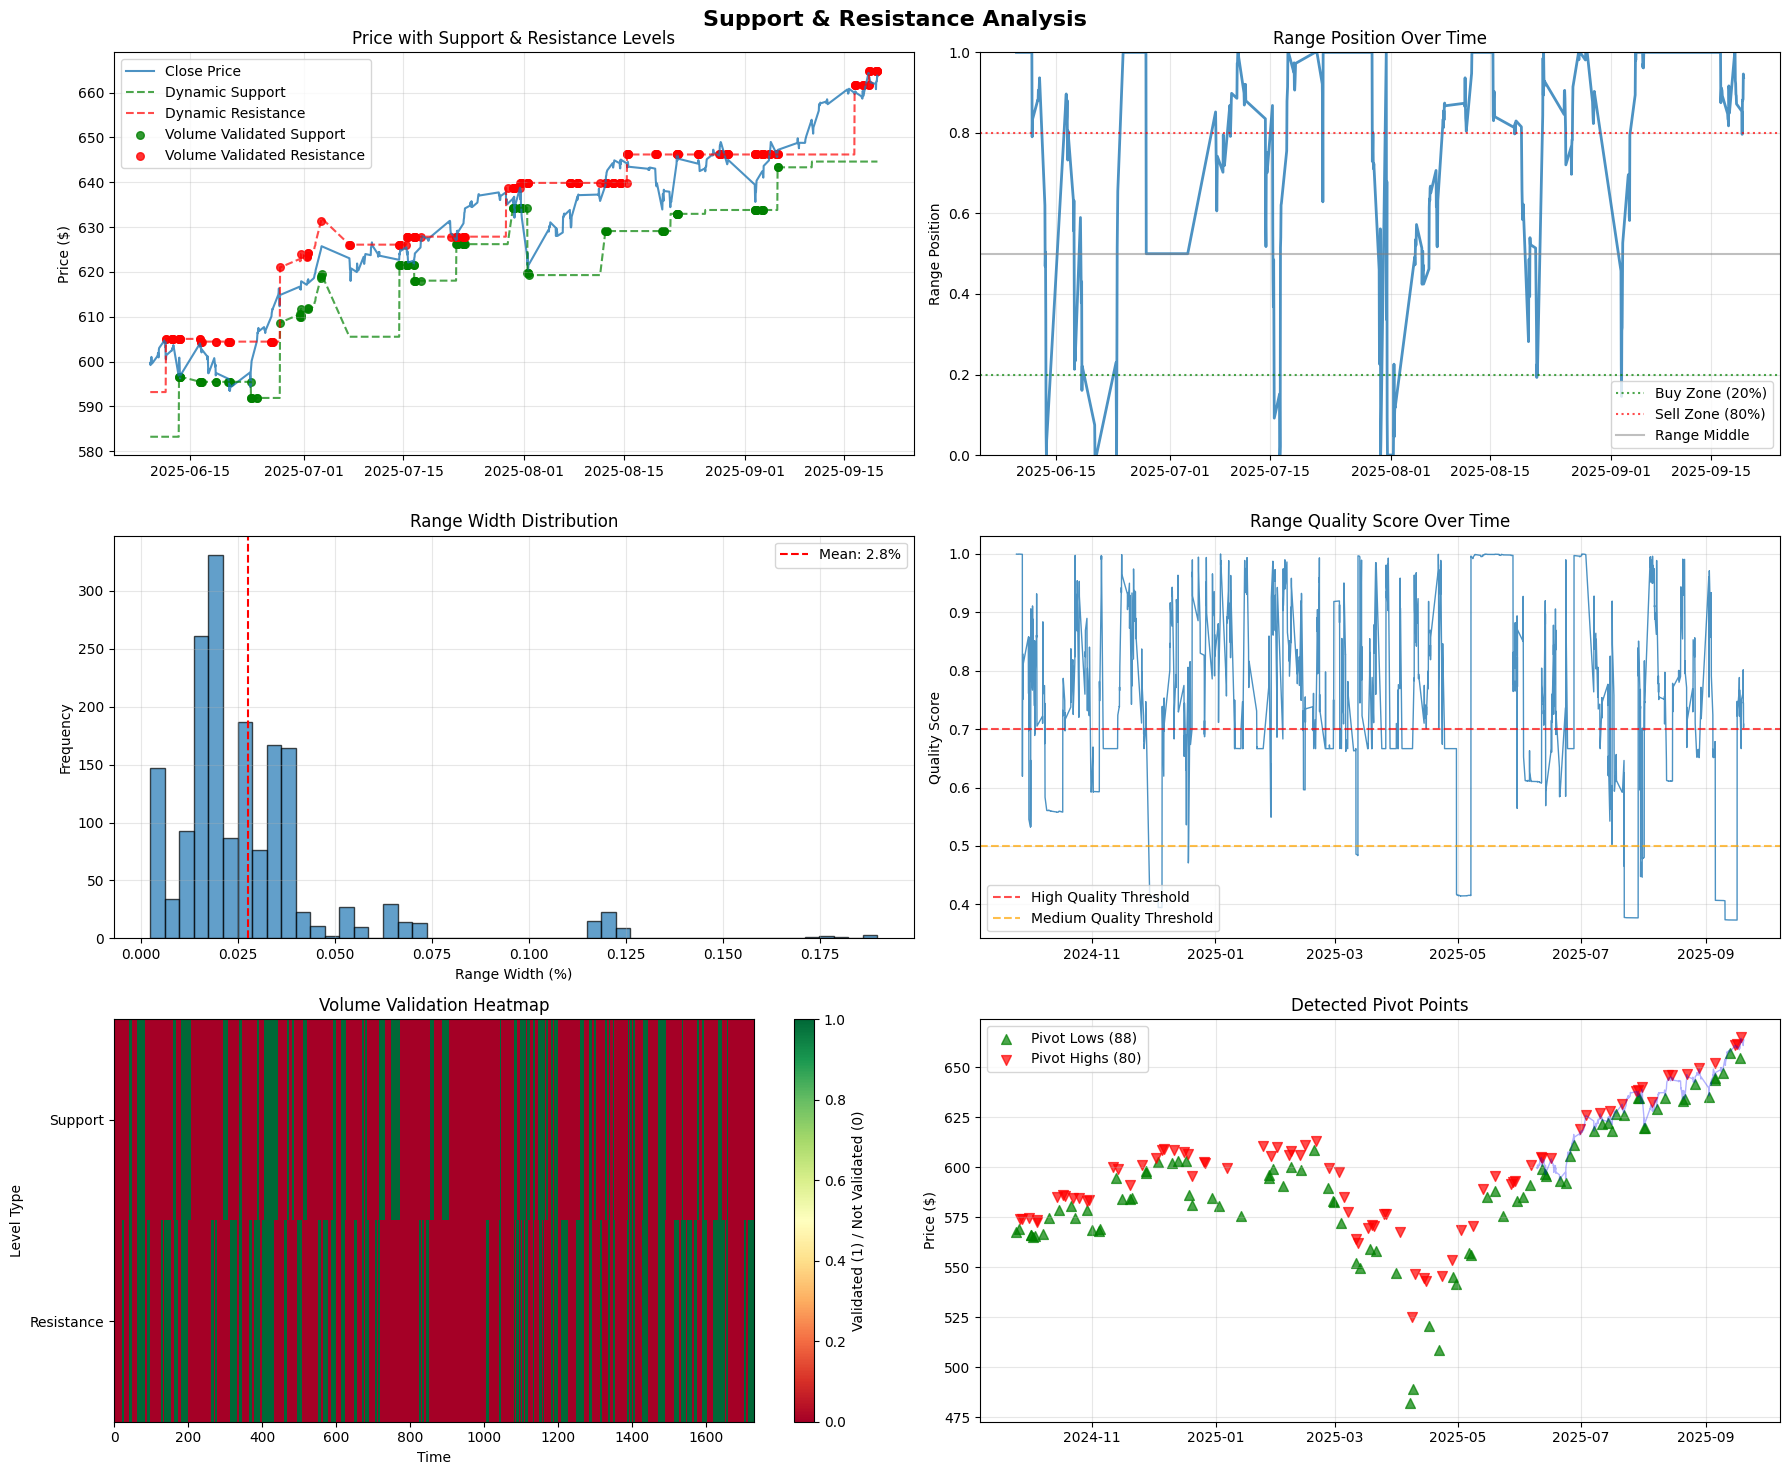

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Support & Resistance Analysis', fontsize=16, fontweight='bold')

ax = axes[0, 0]
recent_periods = 500
recent_sr_data = validated_sr_data.tail(recent_periods)
recent_price_data = spy_prices_df.tail(recent_periods)

ax.plot(recent_price_data.index, recent_price_data['close'], label='Close Price', linewidth=1.5, alpha=0.8)
ax.plot(recent_sr_data.index, recent_sr_data['dynamic_support'], label='Dynamic Support',
        color='green', linestyle='--', alpha=0.7)
ax.plot(recent_sr_data.index, recent_sr_data['dynamic_resistance'], label='Dynamic Resistance',
        color='red', linestyle='--', alpha=0.7)

support_validated_mask = recent_sr_data['support_volume_validated']
resistance_validated_mask = recent_sr_data['resistance_volume_validated']

ax.scatter(recent_sr_data[support_validated_mask].index,
          recent_sr_data[support_validated_mask]['dynamic_support'],
          color='green', marker='o', s=30, alpha=0.8, label='Volume Validated Support')
ax.scatter(recent_sr_data[resistance_validated_mask].index,
          recent_sr_data[resistance_validated_mask]['dynamic_resistance'],
          color='red', marker='o', s=30, alpha=0.8, label='Volume Validated Resistance')

ax.set_title('Price with Support & Resistance Levels')
ax.set_ylabel('Price ($)')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
ax.plot(recent_sr_data.index, recent_sr_data['range_position'], linewidth=2, alpha=0.8)
ax.axhline(y=0.2, color='green', linestyle=':', alpha=0.7, label='Buy Zone (20%)')
ax.axhline(y=0.8, color='red', linestyle=':', alpha=0.7, label='Sell Zone (80%)')
ax.axhline(y=0.5, color='gray', linestyle='-', alpha=0.5, label='Range Middle')
ax.set_title('Range Position Over Time')
ax.set_ylabel('Range Position')
ax.set_ylim(0, 1)
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
ax.hist(validated_sr_data['range_width'].dropna(), bins=50, alpha=0.7, edgecolor='black')
ax.axvline(validated_sr_data['range_width'].mean(), color='red', linestyle='--',
          label=f'Mean: {validated_sr_data["range_width"].mean():.1%}')
ax.set_title('Range Width Distribution')
ax.set_xlabel('Range Width (%)')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
range_quality_all = pivot_detector.get_range_quality(spy_prices_df)
ax.plot(range_quality_all.index, range_quality_all, alpha=0.8, linewidth=1)
ax.axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='High Quality Threshold')
ax.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Medium Quality Threshold')
ax.set_title('Range Quality Score Over Time')
ax.set_ylabel('Quality Score')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 0]
validation_matrix = np.column_stack([
    validated_sr_data['support_volume_validated'].astype(int),
    validated_sr_data['resistance_volume_validated'].astype(int)
]).T

im = ax.imshow(validation_matrix, aspect='auto', cmap='RdYlGn', interpolation='nearest')
ax.set_title('Volume Validation Heatmap')
ax.set_ylabel('Level Type')
ax.set_xlabel('Time')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Support', 'Resistance'])
plt.colorbar(im, ax=ax, label='Validated (1) / Not Validated (0)')

ax = axes[2, 1]
pivot_highs = validated_sr_data['pivot_high'].dropna()
pivot_lows = validated_sr_data['pivot_low'].dropna()

ax.scatter(pivot_lows.index, pivot_lows.values, color='green', marker='^',
          s=50, alpha=0.7, label=f'Pivot Lows ({len(pivot_lows)})')
ax.scatter(pivot_highs.index, pivot_highs.values, color='red', marker='v',
          s=50, alpha=0.7, label=f'Pivot Highs ({len(pivot_highs)})')

ax.plot(recent_price_data.index, recent_price_data['close'],
       color='blue', alpha=0.3, linewidth=1)

ax.set_title('Detected Pivot Points')
ax.set_ylabel('Price ($)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
if len(regime_df) > 0 and 'trading_range' in regime_df['regime_label'].values:

    sr_regime_aligned = validated_sr_data.iloc[regime_start_idx:].copy()
    sr_regime_aligned['regime_label'] = regime_df['regime_label']

    trading_range_sr = sr_regime_aligned[sr_regime_aligned['regime_label'] == 'trading_range']

    print(f"Trading Range Regime Analysis:")
    print(f"Total trading range periods: {len(trading_range_sr)}")

    if len(trading_range_sr) > 0:
        print("Support & Resistance Characteristics in Trading Ranges:")
        print(f"Average range width: {trading_range_sr['range_width'].mean():.2%}")
        print(f"Median range width: {trading_range_sr['range_width'].median():.2%}")
        print(f"Range width std dev: {trading_range_sr['range_width'].std():.2%}")

        print("Range Position Distribution:")
        position_stats = trading_range_sr['range_position'].describe()
        for stat, value in position_stats.items():
            print(f"  {stat}: {value:.3f}")

        print("Volume Validation in Trading Ranges:")
        tr_support_validated = trading_range_sr['support_volume_validated'].sum()
        tr_resistance_validated = trading_range_sr['resistance_volume_validated'].sum()
        print(f"Support validations: {tr_support_validated}/{len(trading_range_sr)} ({tr_support_validated/len(trading_range_sr)*100:.1f}%)")
        print(f"Resistance validations: {tr_resistance_validated}/{len(trading_range_sr)} ({tr_resistance_validated/len(trading_range_sr)*100:.1f}%)")

        tr_range_quality = pivot_detector.get_range_quality(spy_prices_df.iloc[regime_start_idx:])
        tr_quality_in_ranges = tr_range_quality[sr_regime_aligned['regime_label'] == 'trading_range']

        print("Range Quality in Trading Ranges:")
        print(f"Average quality score: {tr_quality_in_ranges.mean():.3f}")
        print(f"High quality periods (>0.7): {(tr_quality_in_ranges > 0.7).sum()}/{len(tr_quality_in_ranges)} ({(tr_quality_in_ranges > 0.7).sum()/len(tr_quality_in_ranges)*100:.1f}%)")

        high_quality_ranges = trading_range_sr[
            (tr_quality_in_ranges > 0.7) &
            (trading_range_sr['range_width'] > 0.02) &
            ((trading_range_sr['support_volume_validated']) | (trading_range_sr['resistance_volume_validated']))
        ]

        print("High-Quality Trading Opportunities:")
        print(f"Periods meeting all criteria: {len(high_quality_ranges)}")
        if len(high_quality_ranges) > 0:
            print(f"Average range width in best opportunities: {high_quality_ranges['range_width'].mean():.2%}")
            print(f"Average validation score: {high_quality_ranges['sr_validation_score'].mean():.3f}")

else:
    print("No trading range regime periods detected for analysis")

Trading Range Regime Analysis:
Total trading range periods: 1291
Support & Resistance Characteristics in Trading Ranges:
Average range width: 2.48%
Median range width: 2.05%
Range width std dev: 1.66%
Range Position Distribution:
  count: 1291.000
  mean: 0.676
  std: 0.314
  min: 0.000
  25%: 0.500
  50%: 0.745
  75%: 1.000
  max: 1.000
Volume Validation in Trading Ranges:
Support validations: 350/1291 (27.1%)
Resistance validations: 474/1291 (36.7%)
Range Quality in Trading Ranges:
Average quality score: 0.745
High quality periods (>0.7): 760/1291 (58.9%)
High-Quality Trading Opportunities:
Periods meeting all criteria: 268
Average range width in best opportunities: 3.13%
Average validation score: 0.569


In [33]:
final_sr_dataset = validated_sr_data.copy()

if len(regime_df) > 0:
    regime_aligned = pd.DataFrame(index=final_sr_dataset.index)
    regime_aligned.loc[regime_df.index, 'regime_label'] = regime_df['regime_label']
    regime_aligned.loc[regime_df.index, 'regime_state'] = regime_df['regime_state']
    regime_aligned = regime_aligned.fillna('unknown')

    final_sr_dataset['regime_label'] = regime_aligned['regime_label']
    final_sr_dataset['regime_state'] = regime_aligned['regime_state']

trading_signals = pivot_detector.get_signals(spy_prices_df)
final_sr_dataset['pivot_signals'] = trading_signals

breakout_signals = pivot_detector.identify_breakouts(spy_prices_df, breakout_threshold=0.015)
final_sr_dataset['upside_breakout'] = breakout_signals['upside_breakout']
final_sr_dataset['downside_breakout'] = breakout_signals['downside_breakout']

print("Final Support/Resistance Dataset:")
print(f"Total observations: {len(final_sr_dataset)}")
print(f"Columns: {len(final_sr_dataset.columns)}")

recent_final = final_sr_dataset.tail(100)
print("Recent Performance (Last 100 periods):")
print(f"Trading signals generated: {(recent_final['pivot_signals'] != 0).sum()}")
print(f"Upside breakouts detected: {recent_final['upside_breakout'].sum()}")
print(f"Downside breakouts detected: {recent_final['downside_breakout'].sum()}")
print(f"Average range quality: {pivot_detector.get_range_quality(spy_prices_df).tail(100).mean():.3f}")

Final Support/Resistance Dataset:
Total observations: 1731
Columns: 27
Recent Performance (Last 100 periods):
Trading signals generated: 89
Upside breakouts detected: 4
Downside breakouts detected: 0
Average range quality: 0.590


# Breakout Probability Prediction

In [34]:
from src.indicators.breakout_probability import CatBoostBreakoutPredictor
from sklearn.metrics import classification_report

In [35]:
breakout_predictor = CatBoostBreakoutPredictor(
    breakout_threshold=0.02,
    lookforward_periods=24,
)

In [36]:
spy_prices_df

,open,high,low,close,volume,dividends,stock splits,capital gains
Datetime,,,,,,,,
2024-09-23 09:30:00-04:00,569.070007,570.332520,568.250000,569.789978,6921524,0.0,0.0,0.0
2024-09-23 10:30:00-04:00,569.799988,570.090027,568.729980,569.734985,3465602,0.0,0.0,0.0
2024-09-23 11:30:00-04:00,569.739990,570.150024,568.359985,568.940002,2894440,0.0,0.0,0.0
2024-09-23 12:30:00-04:00,568.940002,569.200012,568.099976,568.779907,3918975,0.0,0.0,0.0
2024-09-23 13:30:00-04:00,568.809998,569.500000,568.580017,569.239990,2458458,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-09-19 11:30:00-04:00,660.739990,662.679993,660.369995,662.489990,7518824,0.0,0.0,0.0
2025-09-19 12:30:00-04:00,662.479980,662.760010,662.130005,662.479980,4839739,0.0,0.0,0.0
2025-09-19 13:30:00-04:00,662.479980,662.890015,662.325012,662.530029,6925216,0.0,0.0,0.0


In [37]:
training_results = breakout_predictor.fit(
    data=spy_prices_df,
    support_resistance_data=final_sr_dataset,
    test_size=0.2,
    validate_model=True
)

In [38]:
print("MODEL TRAINING RESULTS:")
print(f"Total samples: {training_results['training_stats']['total_samples']}")
print(f"Training samples: {training_results['training_stats']['training_samples']}")
print(f"Test samples: {training_results['training_stats']['test_samples']}")
print(f"Features used: {training_results['training_stats']['feature_count']}")
print(f"Upward breakout rate: {training_results['training_stats']['upward_breakout_rate']:.3%}")
print(f"Downward breakout rate: {training_results['training_stats']['downward_breakout_rate']:.3%}")

print("\n🔺 UPWARD BREAKOUT MODEL PERFORMANCE:")
up_metrics = training_results['upward_model']['classification_report']['macro avg']
print(f"Precision: {up_metrics['precision']:.3f}")
print(f"Recall: {up_metrics['recall']:.3f}")
print(f"F1-Score: {up_metrics['f1-score']:.3f}")
print(f"ROC AUC: {training_results['upward_model']['roc_auc']:.3f}")

print("\n🔻 DOWNWARD BREAKOUT MODEL PERFORMANCE:")
down_metrics = training_results['downward_model']['classification_report']['macro avg']
print(f"Precision: {down_metrics['precision']:.3f}")
print(f"Recall: {down_metrics['recall']:.3f}")
print(f"F1-Score: {down_metrics['f1-score']:.3f}")
print(f"ROC AUC: {training_results['downward_model']['roc_auc']:.3f}")

breakout_predictions = breakout_predictor.predict_breakout_probability(
    data=spy_prices_df,
    support_resistance_data=final_sr_dataset
)

prediction_df = pd.DataFrame(breakout_predictions, index=spy_prices_df.index)
prediction_df['close'] = spy_prices_df['close']
prediction_df['range_position'] = final_sr_dataset['range_position']


MODEL TRAINING RESULTS:
Total samples: 1731
Training samples: 1384
Test samples: 347
Features used: 43
Upward breakout rate: 16.811%
Downward breakout rate: 22.241%

🔺 UPWARD BREAKOUT MODEL PERFORMANCE:
Precision: 0.942
Recall: 0.865
F1-Score: 0.898
ROC AUC: 0.960

🔻 DOWNWARD BREAKOUT MODEL PERFORMANCE:
Precision: 0.945
Recall: 0.857
F1-Score: 0.891
ROC AUC: 0.981


In [39]:
print("\n📈 BREAKOUT PROBABILITY ANALYSIS:")
print(f"Average upward breakout probability: {prediction_df['upward_probability'].mean():.3%}")
print(f"Average downward breakout probability: {prediction_df['downward_probability'].mean():.3%}")
print(f"Average total breakout probability: {prediction_df['total_breakout_probability'].mean():.3%}")
print(f"Average directional bias: {prediction_df['directional_bias'].mean():.3f}")

high_breakout_threshold = 0.7
high_breakout_periods = prediction_df[prediction_df['total_breakout_probability'] > high_breakout_threshold]
print(f"\nHigh breakout probability periods (>{high_breakout_threshold:.0%}): {len(high_breakout_periods)}")

if len(high_breakout_periods) > 0:
    print(f"Average upward bias during high breakout periods: {high_breakout_periods['directional_bias'].mean():.3f}")



📈 BREAKOUT PROBABILITY ANALYSIS:
Average upward breakout probability: 16.263%
Average downward breakout probability: 21.343%
Average total breakout probability: 34.686%
Average directional bias: -0.268

High breakout probability periods (>70%): 581
Average upward bias during high breakout periods: -0.153


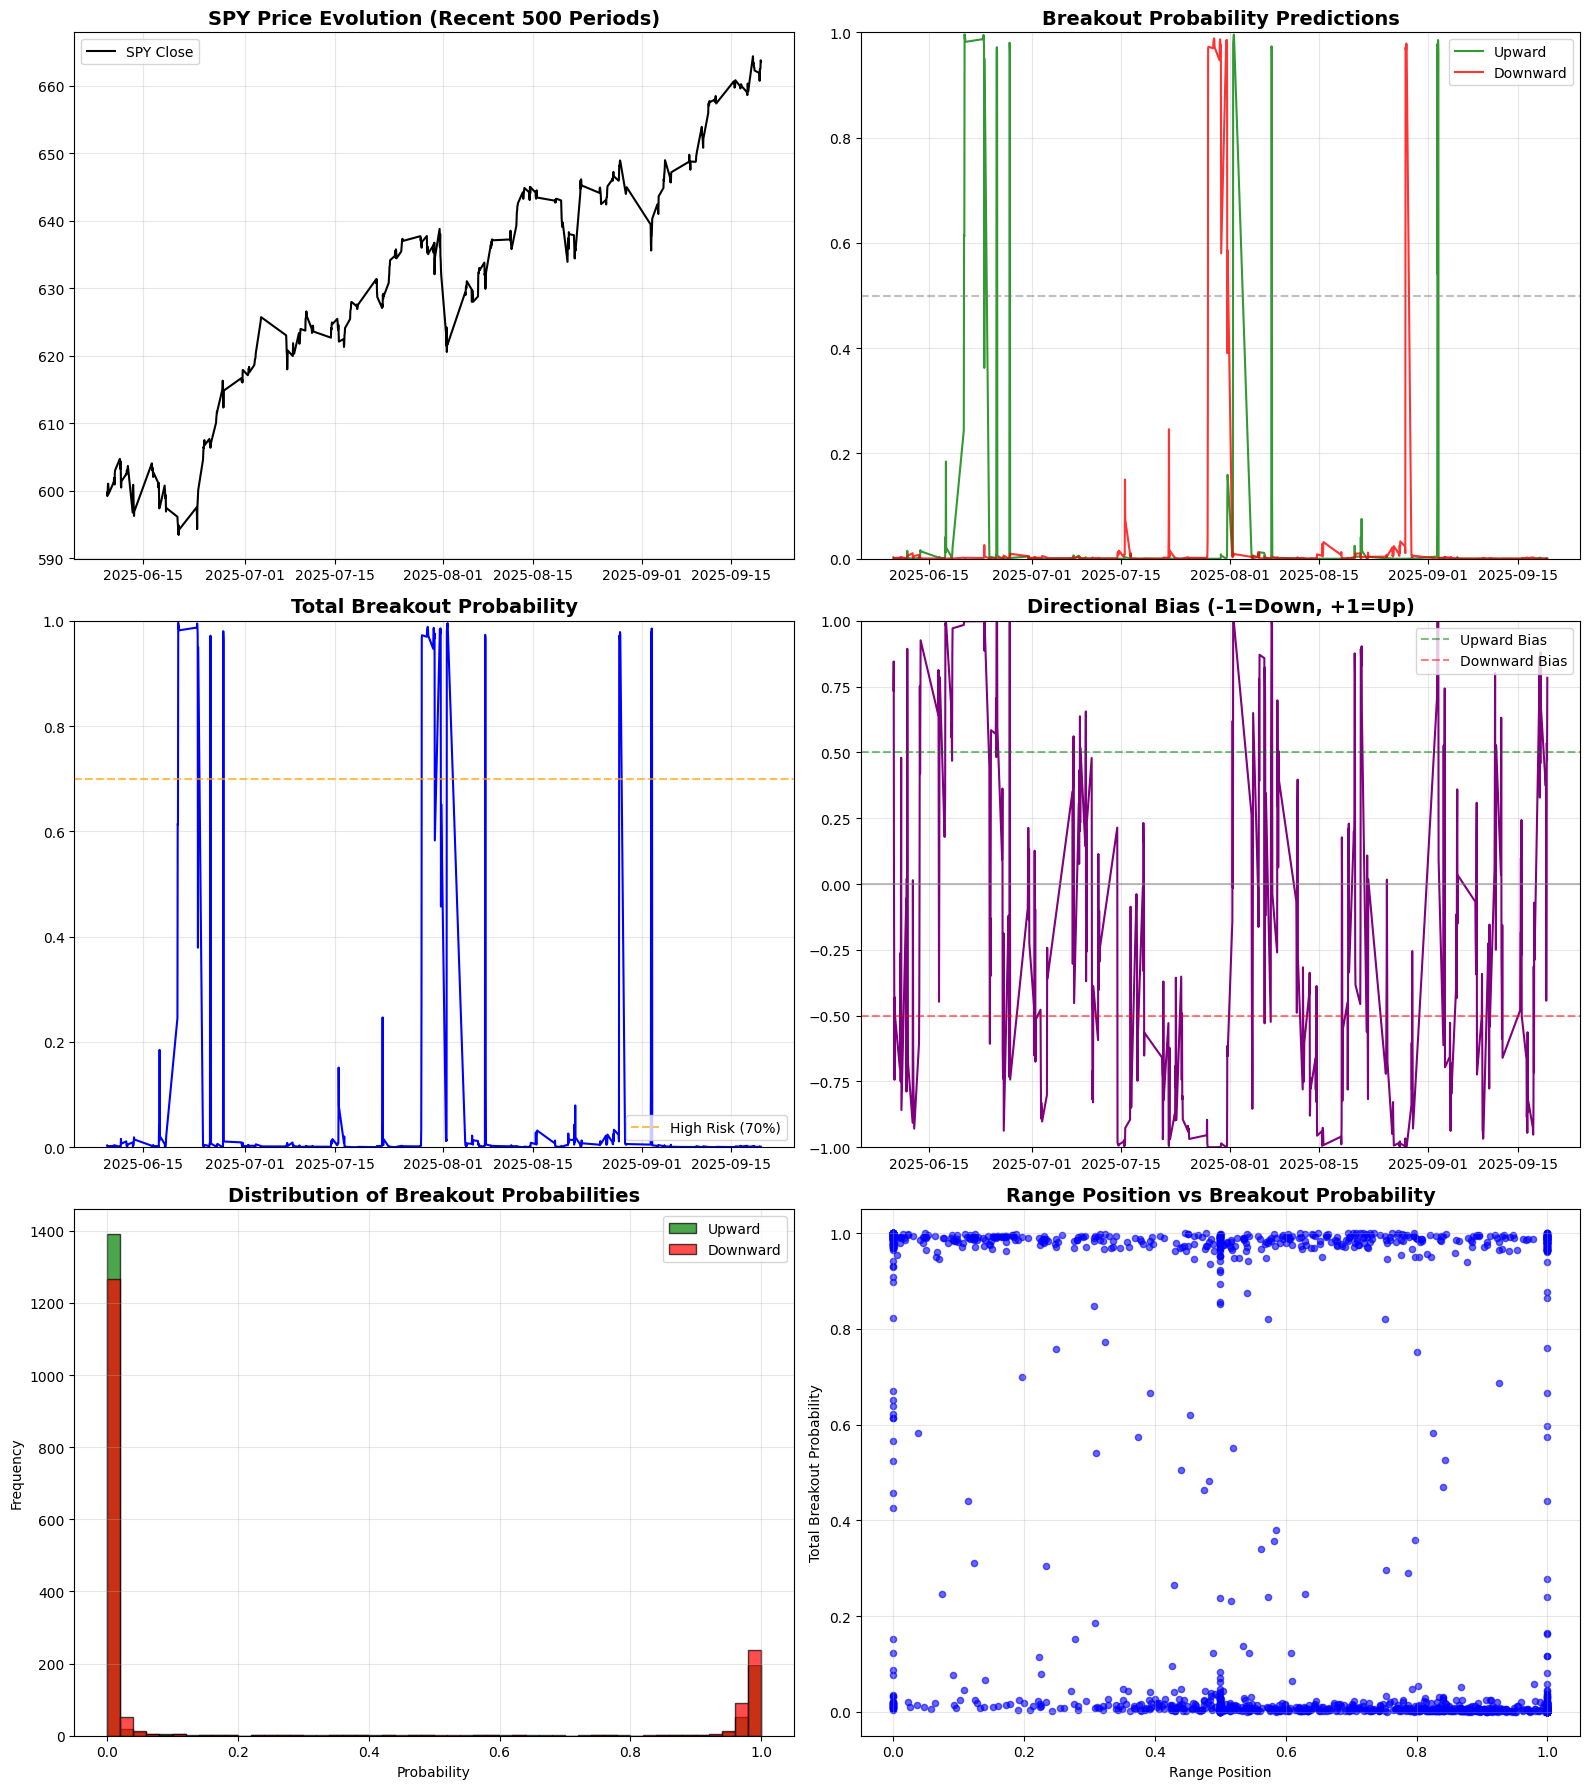

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

recent_data = prediction_df.tail(500)

axes[0, 0].plot(recent_data.index, recent_data['close'], 'k-', linewidth=1.5, label='SPY Close')
axes[0, 0].set_title('SPY Price Evolution (Recent 500 Periods)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(recent_data.index, recent_data['upward_probability'], 'g-', alpha=0.8, label='Upward')
axes[0, 1].plot(recent_data.index, recent_data['downward_probability'], 'r-', alpha=0.8, label='Downward')
axes[0, 1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Breakout Probability Predictions', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(recent_data.index, recent_data['total_breakout_probability'], 'b-', linewidth=1.5)
axes[1, 0].axhline(y=high_breakout_threshold, color='orange', linestyle='--', alpha=0.7, label=f'High Risk ({high_breakout_threshold:.0%})')
axes[1, 0].set_title('Total Breakout Probability', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(recent_data.index, recent_data['directional_bias'], 'purple', linewidth=1.5)
axes[1, 1].axhline(y=0, color='gray', linestyle='-', alpha=0.5)
axes[1, 1].axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Upward Bias')
axes[1, 1].axhline(y=-0.5, color='red', linestyle='--', alpha=0.5, label='Downward Bias')
axes[1, 1].set_title('Directional Bias (-1=Down, +1=Up)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylim(-1, 1)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

axes[2, 0].hist(prediction_df['upward_probability'], bins=50, alpha=0.7, color='green', edgecolor='black', label='Upward')
axes[2, 0].hist(prediction_df['downward_probability'], bins=50, alpha=0.7, color='red', edgecolor='black', label='Downward')
axes[2, 0].set_title('Distribution of Breakout Probabilities', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Probability')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

scatter_x = prediction_df['range_position'].dropna()
scatter_y = prediction_df['total_breakout_probability'][scatter_x.index]
axes[2, 1].scatter(scatter_x, scatter_y, alpha=0.6, s=20, c='blue')
axes[2, 1].set_xlabel('Range Position')
axes[2, 1].set_ylabel('Total Breakout Probability')
axes[2, 1].set_title('Range Position vs Breakout Probability', fontsize=14, fontweight='bold')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

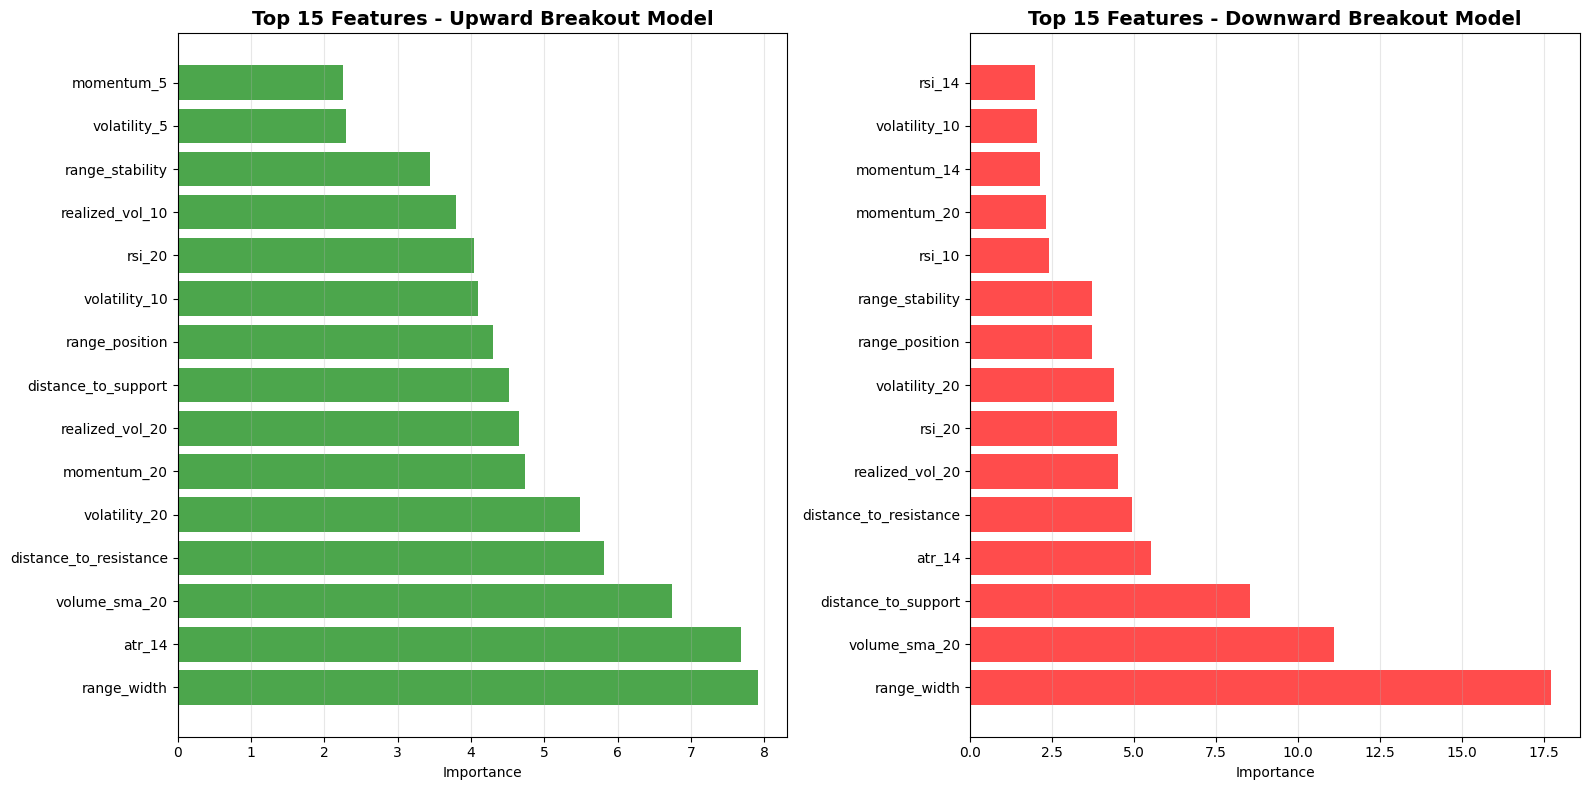

TOP 10 FEATURES FOR UPWARD BREAKOUTS:
 1. range_width: 7.9218
 2. atr_14: 7.6769
 3. volume_sma_20: 6.7387
 4. distance_to_resistance: 5.8124
 5. volatility_20: 5.4876
 6. momentum_20: 4.7313
 7. realized_vol_20: 4.6603
 8. distance_to_support: 4.5151
 9. range_position: 4.2991
10. volatility_10: 4.0900

TOP 10 FEATURES FOR DOWNWARD BREAKOUTS:
 1. range_width: 17.7274
 2. volume_sma_20: 11.1057
 3. distance_to_support: 8.5274
 4. atr_14: 5.5260
 5. distance_to_resistance: 4.9436
 6. realized_vol_20: 4.4997
 7. rsi_20: 4.4882
 8. volatility_20: 4.3944
 9. range_position: 3.7271
10. range_stability: 3.7115


In [41]:
feature_importance = breakout_predictor.get_feature_importance()

upward_importance = pd.Series(feature_importance['upward_model']).sort_values(ascending=False)
downward_importance = pd.Series(feature_importance['downward_model']).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

top_features_up = upward_importance.head(15)
ax1.barh(range(len(top_features_up)), top_features_up.values, color='green', alpha=0.7)
ax1.set_yticks(range(len(top_features_up)))
ax1.set_yticklabels(top_features_up.index, fontsize=10)
ax1.set_xlabel('Importance')
ax1.set_title('Top 15 Features - Upward Breakout Model', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

top_features_down = downward_importance.head(15)
ax2.barh(range(len(top_features_down)), top_features_down.values, color='red', alpha=0.7)
ax2.set_yticks(range(len(top_features_down)))
ax2.set_yticklabels(top_features_down.index, fontsize=10)
ax2.set_xlabel('Importance')
ax2.set_title('Top 15 Features - Downward Breakout Model', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("TOP 10 FEATURES FOR UPWARD BREAKOUTS:")
for i, (feature, importance) in enumerate(upward_importance.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {importance:.4f}")

print()
print("TOP 10 FEATURES FOR DOWNWARD BREAKOUTS:")
for i, (feature, importance) in enumerate(downward_importance.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {importance:.4f}")


In [42]:
combined_predictions = pd.DataFrame({
    'close': spy_prices_df['close'],
    'range_position': final_sr_dataset['range_position'],
    'range_top': final_sr_dataset['range_top'],
    'range_bottom': final_sr_dataset['range_bottom'],
    'upward_probability': prediction_df['upward_probability'],
    'downward_probability': prediction_df['downward_probability'],
    'total_breakout_probability': prediction_df['total_breakout_probability'],
    'directional_bias': prediction_df['directional_bias'],
    'pivot_signals': final_sr_dataset['pivot_signals']
})

risk_adjusted_positions = pd.Series(0, index=combined_predictions.index)

for i in range(len(combined_predictions)):
    current_signal = combined_predictions['pivot_signals'].iloc[i]
    breakout_prob = combined_predictions['total_breakout_probability'].iloc[i]
    range_pos = combined_predictions['range_position'].iloc[i]

    risk_multiplier = 1 - breakout_prob

    if current_signal == 1 and breakout_prob < 0.6:
        if range_pos <= 0.3:
            risk_adjusted_positions.iloc[i] = risk_multiplier * 1.0
    elif current_signal == -1 and breakout_prob < 0.6:
        if range_pos >= 0.7:
            risk_adjusted_positions.iloc[i] = risk_multiplier * -1.0
    elif current_signal in [2, -2]:
        risk_adjusted_positions.iloc[i] = 0

combined_predictions['risk_adjusted_position'] = risk_adjusted_positions

print(f"Original pivot signals: {(final_sr_dataset['pivot_signals'] != 0).sum()}")
print(f"Risk-adjusted signals: {(risk_adjusted_positions != 0).sum()}")

signal_reduction = 1 - (risk_adjusted_positions != 0).sum() / (final_sr_dataset['pivot_signals'] != 0).sum()
print(f"Signal reduction due to breakout risk: {signal_reduction:.1%}")

recent_combined = combined_predictions.tail(100)
print(f"\nRecent period analysis (last 100):")
print(f"High breakout risk periods (>60%): {(recent_combined['total_breakout_probability'] > 0.6).sum()}")
print(f"Average breakout probability: {recent_combined['total_breakout_probability'].mean():.1%}")
print(f"Risk-adjusted position changes: {(recent_combined['risk_adjusted_position'] != 0).sum()}")

print(f"Dataset shape: {combined_predictions.shape}")

Original pivot signals: 1167
Risk-adjusted signals: 0
Signal reduction due to breakout risk: 100.0%

Recent period analysis (last 100):
High breakout risk periods (>60%): 3
Average breakout probability: 3.7%
Risk-adjusted position changes: 0
Dataset shape: (1731, 10)


# Strategy implementation

In [43]:
from src.strategy.range_trading_strategy import RangeTradingStrategy
from src.strategy.signal_generator import RangeTradingSignalGenerator
from config.settings import StrategyConfig

In [44]:
strategy_config = StrategyConfig(
    min_range_width=0.01,
    min_range_quality=0.3,
    base_position_size=1.0
)

range_strategy = RangeTradingStrategy(strategy_config)
training_results = range_strategy.fit_models(spy_prices_df, final_sr_dataset)

In [45]:
range_strategy.update_model_predictions(spy_prices_df, final_sr_dataset)

signal_generator = RangeTradingSignalGenerator(
    strategy=range_strategy,
    buy_threshold=0.3,
    sell_threshold=-0.3
)

trading_signals = signal_generator.generate_entry_signals(spy_prices_df)

signal_filters = {
    'allowed_hours': [9, 10, 11, 12, 13, 14, 15],
    'min_signal_gap': 2,
    'max_daily_signals': 5,
    'max_volatility': 0.05
}

filtered_signals = signal_generator.filter_signals(trading_signals, signal_filters)

In [46]:
signal_stats = signal_generator.get_signal_statistics(filtered_signals)

for key, value in signal_stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.3f}")
    else:
        print(f"{key}: {value}")

recent_signals = filtered_signals.tail(100)
print(f"\nRecent signals (last 100 periods):")
print(f"Buy signals: {(recent_signals == 'buy').sum()}")
print(f"Sell signals: {(recent_signals == 'sell').sum()}")
print(f"Neutral periods: {(recent_signals == 'neutral').sum()}")

print(f"\nDEBUG: Strategy Score Analysis")
recent_periods_debug = 50
recent_price_debug = spy_prices_df.tail(recent_periods_debug)
recent_sr_debug = final_sr_dataset.tail(recent_periods_debug)

print(f"Recent S/R levels (last 5 periods):")
for i in range(-5, 0):
    idx = recent_sr_debug.index[i]
    support = recent_sr_debug['dynamic_support'].iloc[i]
    resistance = recent_sr_debug['dynamic_resistance'].iloc[i]
    range_width = recent_sr_debug['range_width'].iloc[i]
    range_pos = recent_sr_debug['range_position'].iloc[i]
    print(f"  {idx}: Support=${support:.2f}, Resistance=${resistance:.2f}, Width={range_width:.3f}, Position={range_pos:.3f}")

print(f"\nSample strategy scores (last 10 periods):")
for i in range(-10, 0):
    timestamp = recent_price_debug.index[i]
    score = range_strategy.calculate_strategy_score(timestamp)
    regime = range_strategy.current_regime_data.loc[timestamp, 'regime_label'] if timestamp in range_strategy.current_regime_data.index else 'unknown'
    print(f"  {timestamp}: Score={score:.3f}, Regime={regime}")

total_signals: 214
buy_signals: 47
sell_signals: 167
neutral_periods: 1517
signal_frequency: 0.124
avg_daily_signals: 2.432
max_daily_signals: 4
signal_days: 88

Recent signals (last 100 periods):
Buy signals: 0
Sell signals: 11
Neutral periods: 89

DEBUG: Strategy Score Analysis
Recent S/R levels (last 5 periods):
  2025-09-19 11:30:00-04:00: Support=$644.61, Resistance=$664.89, Width=0.031, Position=0.882
  2025-09-19 12:30:00-04:00: Support=$644.61, Resistance=$664.89, Width=0.031, Position=0.881
  2025-09-19 13:30:00-04:00: Support=$644.61, Resistance=$664.89, Width=0.031, Position=0.884
  2025-09-19 14:30:00-04:00: Support=$644.61, Resistance=$664.89, Width=0.031, Position=0.946
  2025-09-19 15:30:00-04:00: Support=$644.61, Resistance=$664.89, Width=0.031, Position=0.937

Sample strategy scores (last 10 periods):
  2025-09-18 13:30:00-04:00: Score=-0.305, Regime=trading_range
  2025-09-18 14:30:00-04:00: Score=-0.283, Regime=trading_range
  2025-09-18 15:30:00-04:00: Score=-0.145,

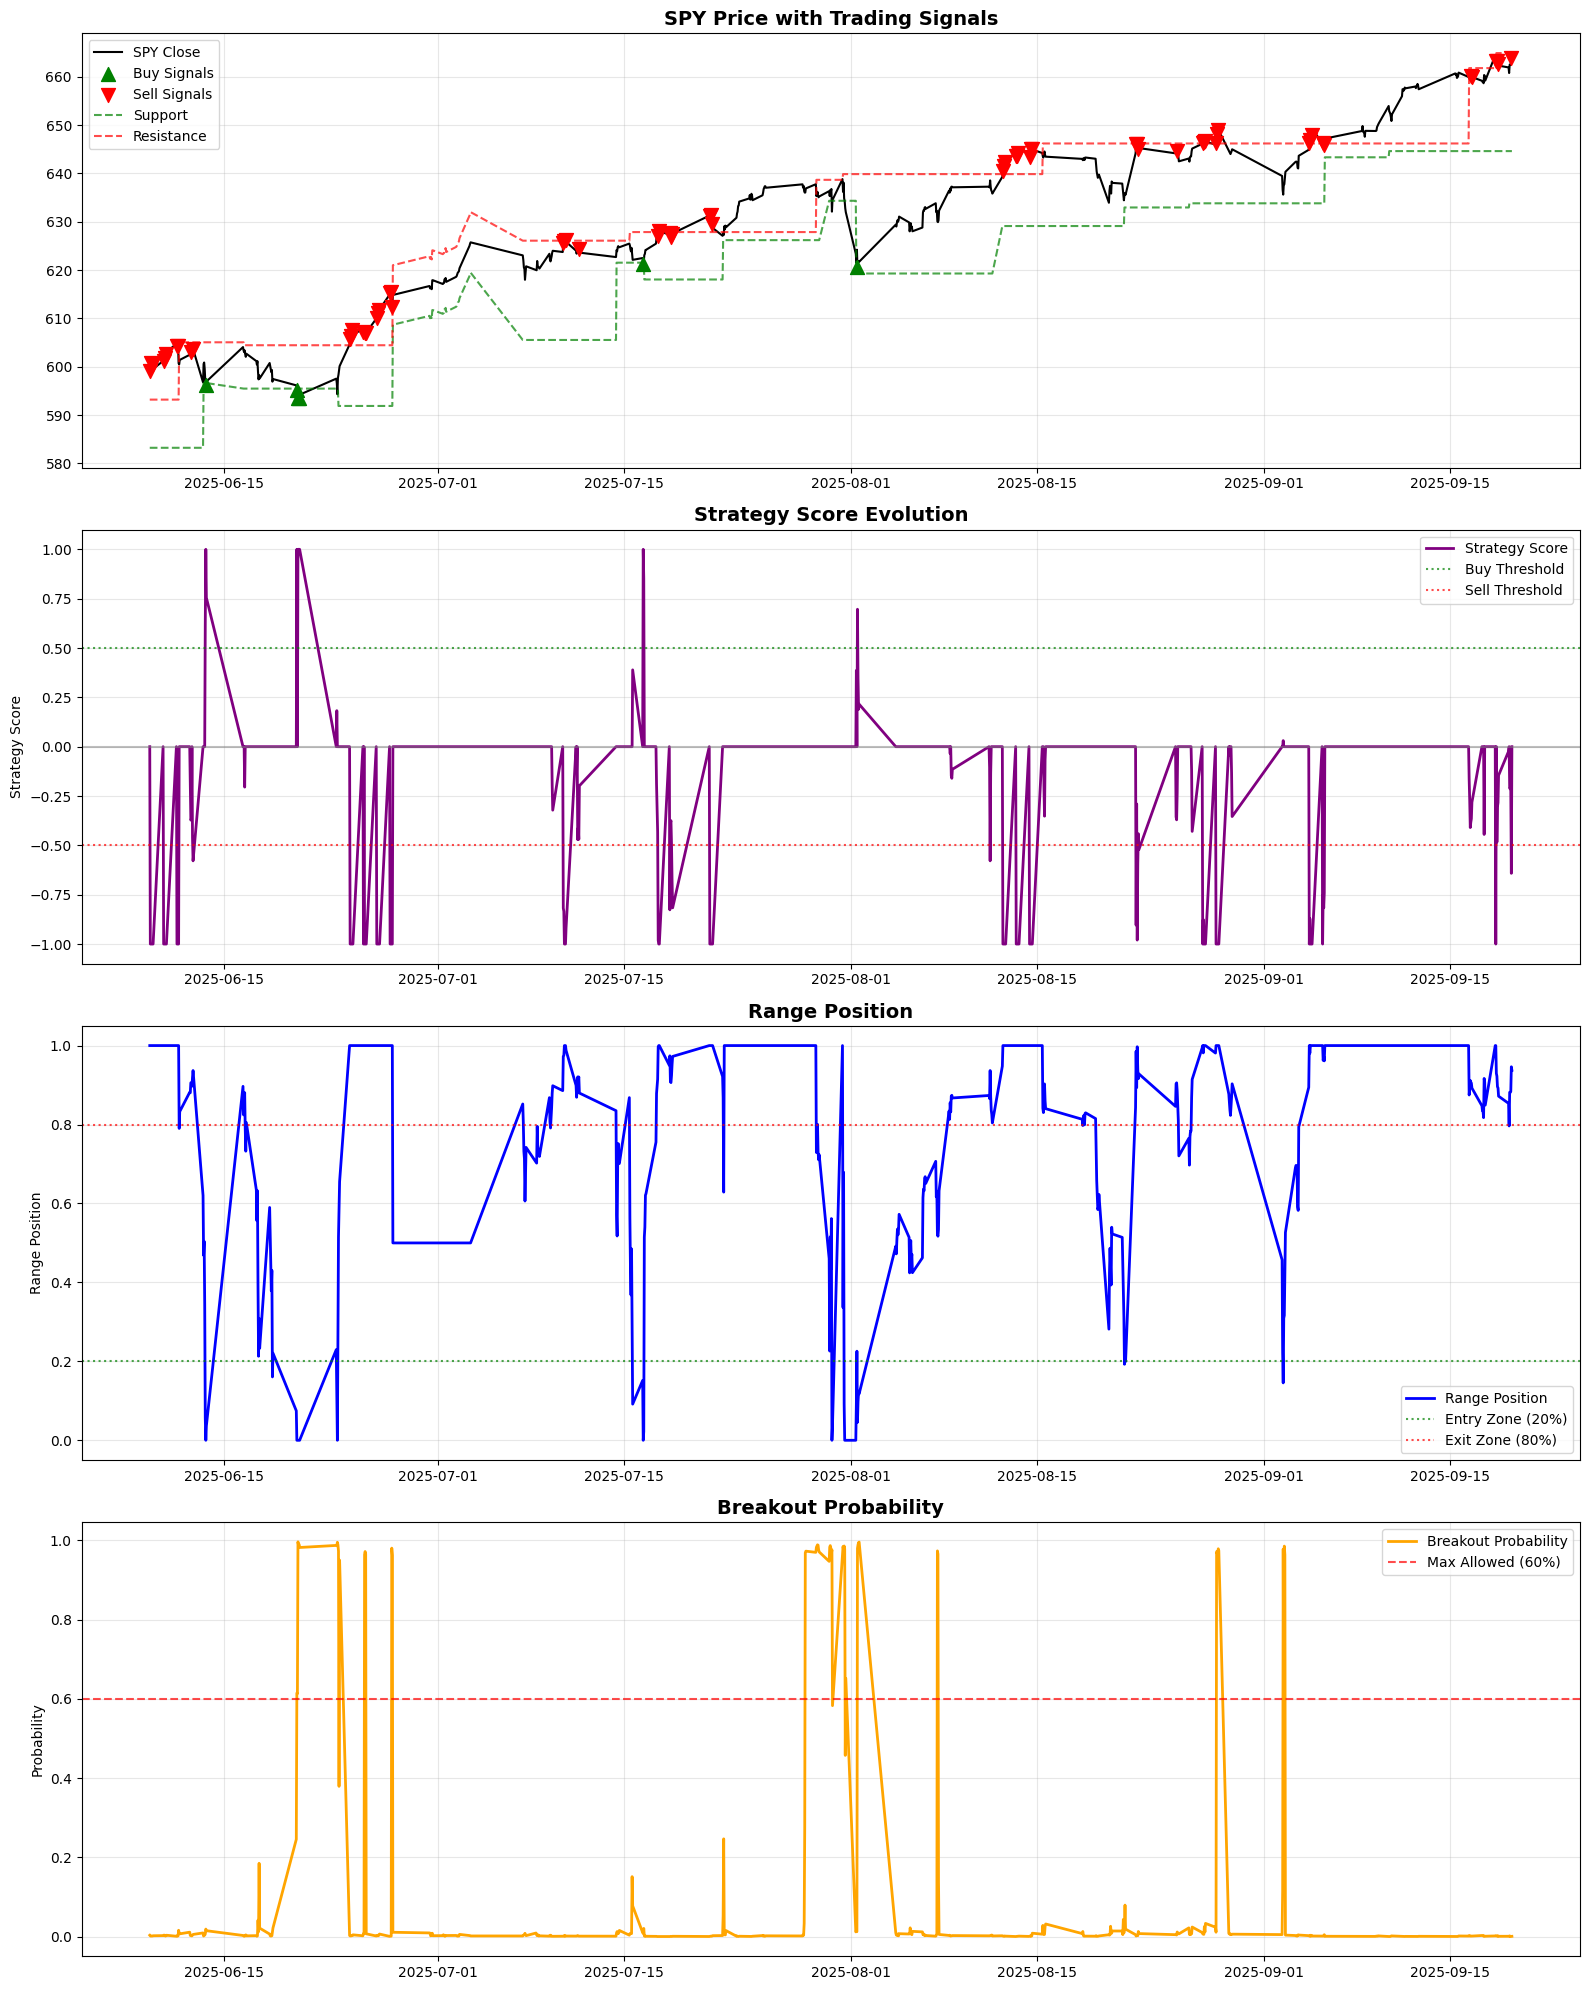

In [47]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20))

recent_periods = 500
recent_price = spy_prices_df.tail(recent_periods)
recent_sr = final_sr_dataset.tail(recent_periods)
recent_signals_plot = filtered_signals.tail(recent_periods)
recent_predictions = prediction_df.tail(recent_periods)

ax = axes[0]
ax.plot(recent_price.index, recent_price['close'], 'k-', linewidth=1.5, label='SPY Close')

buy_mask = recent_signals_plot == 'buy'
sell_mask = recent_signals_plot == 'sell'

if buy_mask.any():
    ax.scatter(recent_signals_plot[buy_mask].index,
              recent_price.loc[recent_signals_plot[buy_mask].index, 'close'],
              color='green', marker='^', s=100, label='Buy Signals', zorder=5)

if sell_mask.any():
    ax.scatter(recent_signals_plot[sell_mask].index,
              recent_price.loc[recent_signals_plot[sell_mask].index, 'close'],
              color='red', marker='v', s=100, label='Sell Signals', zorder=5)

ax.plot(recent_sr.index, recent_sr['dynamic_support'], 'g--', alpha=0.7, label='Support')
ax.plot(recent_sr.index, recent_sr['dynamic_resistance'], 'r--', alpha=0.7, label='Resistance')
ax.set_title('SPY Price with Trading Signals', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1]
strategy_scores = pd.Series(0.0, index=recent_price.index)
for timestamp in recent_price.index:
    strategy_scores.loc[timestamp] = range_strategy.calculate_strategy_score(timestamp)

ax.plot(strategy_scores.index, strategy_scores, 'purple', linewidth=2, label='Strategy Score')
ax.axhline(y=0.5, color='green', linestyle=':', alpha=0.7, label='Buy Threshold')
ax.axhline(y=-0.5, color='red', linestyle=':', alpha=0.7, label='Sell Threshold')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.set_title('Strategy Score Evolution', fontsize=14, fontweight='bold')
ax.set_ylabel('Strategy Score')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2]
ax.plot(recent_sr.index, recent_sr['range_position'], 'blue', linewidth=2, label='Range Position')
ax.axhline(y=0.2, color='green', linestyle=':', alpha=0.7, label='Entry Zone (20%)')
ax.axhline(y=0.8, color='red', linestyle=':', alpha=0.7, label='Exit Zone (80%)')
ax.set_title('Range Position', fontsize=14, fontweight='bold')
ax.set_ylabel('Range Position')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[3]
ax.plot(recent_predictions.index, recent_predictions['total_breakout_probability'],
        'orange', linewidth=2, label='Breakout Probability')
ax.axhline(y=0.6, color='red', linestyle='--', alpha=0.7, label='Max Allowed (60%)')
ax.set_title('Breakout Probability', fontsize=14, fontweight='bold')
ax.set_ylabel('Probability')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
def analyze_signal_performance(signals: pd.Series, prices: pd.DataFrame,
                              sr_data: pd.DataFrame, predictions: pd.DataFrame) -> Dict:
    performance_analysis = {
        'signal_timing': {},
        'range_analysis': {},
        'regime_alignment': {},
        'breakout_avoidance': {}
    }

    signal_times = signals[signals != 'neutral']

    if len(signal_times) > 0:
        signal_positions = []
        for timestamp in signal_times.index:
            if timestamp in sr_data.index:
                pos = sr_data.loc[timestamp, 'range_position']
                if not pd.isna(pos):
                    signal_positions.append(pos)

        performance_analysis['signal_timing'] = {
            'avg_range_position': np.mean(signal_positions) if signal_positions else 0,
            'signals_near_support': sum(1 for p in signal_positions if p <= 0.3),
            'signals_near_resistance': sum(1 for p in signal_positions if p >= 0.7),
            'signals_in_middle': sum(1 for p in signal_positions if 0.3 < p < 0.7)
        }

        signal_breakout_probs = []
        for timestamp in signal_times.index:
            if timestamp in predictions.index:
                prob = predictions.loc[timestamp, 'total_breakout_probability']
                if not pd.isna(prob):
                    signal_breakout_probs.append(prob)

        performance_analysis['breakout_avoidance'] = {
            'avg_breakout_prob': np.mean(signal_breakout_probs) if signal_breakout_probs else 0,
            'signals_low_breakout': sum(1 for p in signal_breakout_probs if p < 0.3),
            'signals_medium_breakout': sum(1 for p in signal_breakout_probs if 0.3 <= p < 0.6),
            'signals_high_breakout': sum(1 for p in signal_breakout_probs if p >= 0.6)
        }

    if len(range_strategy.current_regime_data) > 0:
        trading_range_periods = range_strategy.current_regime_data[
            range_strategy.current_regime_data['regime_label'] == 'trading_range'
        ]

        signals_in_trading_ranges = 0
        for timestamp in signal_times.index:
            if timestamp in trading_range_periods.index:
                signals_in_trading_ranges += 1

        performance_analysis['regime_alignment'] = {
            'total_trading_range_periods': len(trading_range_periods),
            'signals_in_trading_ranges': signals_in_trading_ranges,
            'regime_alignment_rate': signals_in_trading_ranges / len(signal_times) if len(signal_times) > 0 else 0
        }

    return performance_analysis

performance_results = analyze_signal_performance(
    filtered_signals, spy_prices_df, final_sr_dataset, prediction_df
)

print("\nSTRATEGY PERFORMANCE ANALYSIS:")
print("="*50)

for category, metrics in performance_results.items():
    print(f"\n{category.upper().replace('_', ' ')}:")
    for metric, value in metrics.items():
        if isinstance(value, float):
            print(f"  {metric}: {value:.3f}")
        else:
            print(f"  {metric}: {value}")


STRATEGY PERFORMANCE ANALYSIS:

SIGNAL TIMING:
  avg_range_position: 0.768
  signals_near_support: 47
  signals_near_resistance: 167
  signals_in_middle: 0

RANGE ANALYSIS:

REGIME ALIGNMENT:
  total_trading_range_periods: 1291
  signals_in_trading_ranges: 214
  regime_alignment_rate: 1.000

BREAKOUT AVOIDANCE:
  avg_breakout_prob: 0.324
  signals_low_breakout: 143
  signals_medium_breakout: 1
  signals_high_breakout: 70


In [49]:
print(f"Regime Detection: {len(range_strategy.current_regime_data)} regime predictions generated")
print(f"Support/Resistance: {len(final_sr_dataset)} S/R levels calculated")
print(f"Breakout Prediction: {len(prediction_df)} breakout probabilities generated")
print(f"Signal Generation: {len(filtered_signals)} total periods analyzed")

trading_range_coverage = (range_strategy.current_regime_data['regime_label'] == 'trading_range').sum()
print(f"Trading Range Coverage: {trading_range_coverage}/{len(range_strategy.current_regime_data)} periods ({trading_range_coverage/len(range_strategy.current_regime_data)*100:.1f}%)")

high_quality_ranges = (pivot_detector.get_range_quality(spy_prices_df) > 0.7).sum()
print(f"High Quality Ranges: {high_quality_ranges} periods identified")

low_breakout_periods = (prediction_df['total_breakout_probability'] < 0.6).sum()
print(f"Safe Trading Periods: {low_breakout_periods}/{len(prediction_df)} periods ({low_breakout_periods/len(prediction_df)*100:.1f}%)")

active_signals = len(filtered_signals[filtered_signals != 'neutral'])
print(f"Active Trading Signals: {active_signals} generated")

Regime Detection: 1711 regime predictions generated
Support/Resistance: 1731 S/R levels calculated
Breakout Prediction: 1731 breakout probabilities generated
Signal Generation: 1731 total periods analyzed
Trading Range Coverage: 1291/1711 periods (75.5%)
High Quality Ranges: 1023 periods identified
Safe Trading Periods: 1140/1731 periods (65.9%)
Active Trading Signals: 214 generated


# Strategy Parameters Optimization

In [50]:
from src.strategy.parameter_optimizer import RangeTradingOptimizer
from src.strategy.optimization_metrics import StrategyEvaluator
from src.backtesting.backtest_engine import BacktestEngine

In [51]:
optimization_split = int(0.8 * len(spy_prices_df))
train_data = spy_prices_df.iloc[:optimization_split].copy()
val_data = spy_prices_df.iloc[optimization_split:].copy()

print(f"Training data: {len(train_data)} periods ({train_data.index[0]} to {train_data.index[-1]})")
print(f"Validation data: {len(val_data)} periods ({val_data.index[0]} to {val_data.index[-1]})")

Training data: 1384 periods (2024-09-23 09:30:00-04:00 to 2025-07-11 11:30:00-04:00)
Validation data: 347 periods (2025-07-11 12:30:00-04:00 to 2025-09-19 15:30:00-04:00)


In [52]:
backtest_engine = BacktestEngine()

optimizer = RangeTradingOptimizer(
    data_config=data_config,
    backtest_engine=backtest_engine,
    optimization_metric='total_return',
    n_trials=100,
    random_seed=13
)

In [53]:
optimization_result = optimizer.optimize(
    train_data=train_data,
    validation_data=val_data
)

print(f"Best {optimizer.optimization_metric}: {optimization_result.best_value:.4f}")

[I 2025-09-21 02:16:44,973] A new study created in memory with name: range_trading_optimization_total_return
Best trial: 0. Best value: -0.111207:   1%|          | 1/100 [00:00<01:10,  1.40it/s]

[I 2025-09-21 02:16:45,686] Trial 0 finished with value: -0.11120717665171968 and parameters: {'min_range_width': 0.03999660847582191, 'min_range_quality': 0.21877061001745615, 'base_position_size': 1.7364177989920528, 'support_distance_threshold': 0.48458713911934986, 'resistance_distance_threshold': 0.487670501257202, 'max_trading_distance': 0.38137969896692486, 'buy_score_threshold': 0.4654254776567668, 'sell_score_threshold': 0.5653159087629079, 'pivot_window': 36, 'buy_threshold': 0.7359173180410998, 'sell_threshold': 0.08328469789636544, 'neutral_buffer': 0.09476742063337693}. Best is trial 0 with value: -0.11120717665171968.


Best trial: 1. Best value: 0.151662:   2%|▏         | 2/100 [00:01<01:15,  1.29it/s] 

[I 2025-09-21 02:16:46,504] Trial 1 finished with value: 0.15166208935063744 and parameters: {'min_range_width': 0.007633062134693364, 'min_range_quality': 0.5285304712935994, 'base_position_size': 1.0592810418122112, 'support_distance_threshold': 0.35593157821014365, 'resistance_distance_threshold': 0.16532597719698355, 'max_trading_distance': 0.3390324860609968, 'buy_score_threshold': 0.10564766204858166, 'sell_score_threshold': 0.31500026962298183, 'pivot_window': 48, 'buy_threshold': 0.25700405867510445, 'sell_threshold': 0.3534217980613463, 'neutral_buffer': 0.18766585790008816}. Best is trial 1 with value: 0.15166208935063744.


Best trial: 2. Best value: 0.269378:   3%|▎         | 3/100 [00:02<01:15,  1.29it/s]

[I 2025-09-21 02:16:47,282] Trial 2 finished with value: 0.269378335803819 and parameters: {'min_range_width': 0.006435664989795263, 'min_range_quality': 0.13254226852125725, 'base_position_size': 1.4447434986617345, 'support_distance_threshold': 0.4432160494757924, 'resistance_distance_threshold': 0.053922079536703194, 'max_trading_distance': 0.498630894797575, 'buy_score_threshold': 0.587704702601574, 'sell_score_threshold': 0.14543046770336004, 'pivot_window': 36, 'buy_threshold': 0.5337990900793422, 'sell_threshold': 0.5058892219215639, 'neutral_buffer': 0.19333612173965997}. Best is trial 2 with value: 0.269378335803819.


Best trial: 2. Best value: 0.269378:   4%|▍         | 4/100 [00:03<01:14,  1.28it/s]

[I 2025-09-21 02:16:48,069] Trial 3 finished with value: 0.2237133120358789 and parameters: {'min_range_width': 0.005000541510626829, 'min_range_quality': 0.22348935049595817, 'base_position_size': 1.5683490168673753, 'support_distance_threshold': 0.19606192240402093, 'resistance_distance_threshold': 0.17464836037271428, 'max_trading_distance': 0.4781781810213898, 'buy_score_threshold': 0.6511310488875692, 'sell_score_threshold': 0.24668542131879417, 'pivot_window': 28, 'buy_threshold': 0.2903430486804311, 'sell_threshold': 0.41036662690891285, 'neutral_buffer': 0.14068082429475667}. Best is trial 2 with value: 0.269378335803819.


Best trial: 2. Best value: 0.269378:   5%|▌         | 5/100 [00:03<01:12,  1.31it/s]

[I 2025-09-21 02:16:48,799] Trial 4 finished with value: -0.12217679687113203 and parameters: {'min_range_width': 0.03975704418562511, 'min_range_quality': 0.13395874839720726, 'base_position_size': 1.5291276187809701, 'support_distance_threshold': 0.29671704382812136, 'resistance_distance_threshold': 0.11209372374121576, 'max_trading_distance': 0.23950128768196738, 'buy_score_threshold': 0.24733546319479338, 'sell_score_threshold': 0.19107199755068355, 'pivot_window': 47, 'buy_threshold': 0.69609976482441, 'sell_threshold': 0.2757759757856991, 'neutral_buffer': 0.13533278788348407}. Best is trial 2 with value: 0.269378335803819.


Best trial: 2. Best value: 0.269378:   6%|▌         | 6/100 [00:04<01:10,  1.32it/s]

[I 2025-09-21 02:16:49,540] Trial 5 finished with value: 0.10152813444349304 and parameters: {'min_range_width': 0.030048442314548122, 'min_range_quality': 0.1363686054421739, 'base_position_size': 1.7595627656241062, 'support_distance_threshold': 0.23239377171415915, 'resistance_distance_threshold': 0.1151919450708463, 'max_trading_distance': 0.27636802346663747, 'buy_score_threshold': 0.3943840822390965, 'sell_score_threshold': 0.527214624549852, 'pivot_window': 50, 'buy_threshold': 0.8810471766482922, 'sell_threshold': 0.5240895997058492, 'neutral_buffer': 0.06601699909905634}. Best is trial 2 with value: 0.269378335803819.


Best trial: 2. Best value: 0.269378:   7%|▋         | 7/100 [00:05<01:09,  1.34it/s]

[I 2025-09-21 02:16:50,275] Trial 6 finished with value: -0.1394208379583202 and parameters: {'min_range_width': 0.04609457631453394, 'min_range_quality': 0.2824579804431425, 'base_position_size': 0.8398818153491425, 'support_distance_threshold': 0.4425943380554428, 'resistance_distance_threshold': 0.11136125829165708, 'max_trading_distance': 0.2945520640611281, 'buy_score_threshold': 0.45723954721142757, 'sell_score_threshold': 0.43835356544722903, 'pivot_window': 49, 'buy_threshold': 0.48057736656241984, 'sell_threshold': 0.17251017084961345, 'neutral_buffer': 0.16408515151510852}. Best is trial 2 with value: 0.269378335803819.


Best trial: 2. Best value: 0.269378:   8%|▊         | 8/100 [00:06<01:10,  1.31it/s]

[I 2025-09-21 02:16:51,075] Trial 7 finished with value: 0.19782375356475265 and parameters: {'min_range_width': 0.014073533380135186, 'min_range_quality': 0.18786493160659082, 'base_position_size': 1.1556770189762167, 'support_distance_threshold': 0.20311736128151564, 'resistance_distance_threshold': 0.4852638988522562, 'max_trading_distance': 0.2572104308350286, 'buy_score_threshold': 0.6067351196836708, 'sell_score_threshold': 0.5016436839883978, 'pivot_window': 14, 'buy_threshold': 0.1338408630278103, 'sell_threshold': 0.9681389392135208, 'neutral_buffer': 0.07914462278195097}. Best is trial 2 with value: 0.269378335803819.


Best trial: 8. Best value: 0.270203:   9%|▉         | 9/100 [00:06<01:10,  1.29it/s]

[I 2025-09-21 02:16:51,870] Trial 8 finished with value: 0.27020288340356546 and parameters: {'min_range_width': 0.008685502700825532, 'min_range_quality': 0.23469234763993183, 'base_position_size': 1.4751957770197, 'support_distance_threshold': 0.29604976040509723, 'resistance_distance_threshold': 0.36352617973396295, 'max_trading_distance': 0.5852392310811714, 'buy_score_threshold': 0.26663291783885235, 'sell_score_threshold': 0.24017587710878013, 'pivot_window': 44, 'buy_threshold': 0.2630018470935421, 'sell_threshold': 0.7044609845807549, 'neutral_buffer': 0.07302419554675592}. Best is trial 8 with value: 0.27020288340356546.


Best trial: 8. Best value: 0.270203:  10%|█         | 10/100 [00:07<01:09,  1.30it/s]

[I 2025-09-21 02:16:52,630] Trial 9 finished with value: 0.2443331064871967 and parameters: {'min_range_width': 0.014161916127001111, 'min_range_quality': 0.13379944680178849, 'base_position_size': 1.6242285431524621, 'support_distance_threshold': 0.13103572793810694, 'resistance_distance_threshold': 0.10591731961246567, 'max_trading_distance': 0.28992290956351857, 'buy_score_threshold': 0.2676757321891745, 'sell_score_threshold': 0.1202930386262735, 'pivot_window': 20, 'buy_threshold': 0.6854119711002126, 'sell_threshold': 0.7719231265897044, 'neutral_buffer': 0.08390216213999253}. Best is trial 8 with value: 0.27020288340356546.


Best trial: 8. Best value: 0.270203:  11%|█         | 11/100 [00:08<01:08,  1.30it/s]

[I 2025-09-21 02:16:53,394] Trial 10 finished with value: 0.042392611967867436 and parameters: {'min_range_width': 0.025503120617736262, 'min_range_quality': 0.41863968841781996, 'base_position_size': 0.5214603456983065, 'support_distance_threshold': 0.06151571557510277, 'resistance_distance_threshold': 0.35567786498137544, 'max_trading_distance': 0.5892956707808487, 'buy_score_threshold': 0.11305766325478411, 'sell_score_threshold': 0.6929596685246417, 'pivot_window': 40, 'buy_threshold': 0.05448263677475726, 'sell_threshold': 0.7403666810971209, 'neutral_buffer': 0.05091291103901703}. Best is trial 8 with value: 0.27020288340356546.


Best trial: 8. Best value: 0.270203:  12%|█▏        | 12/100 [00:09<01:07,  1.29it/s]

[I 2025-09-21 02:16:54,177] Trial 11 finished with value: 0.23078892664074022 and parameters: {'min_range_width': 0.017886532734842187, 'min_range_quality': 0.34665317342659585, 'base_position_size': 1.40282057154618, 'support_distance_threshold': 0.3788427902073481, 'resistance_distance_threshold': 0.32558858897150655, 'max_trading_distance': 0.5656976884832903, 'buy_score_threshold': 0.5546965744715882, 'sell_score_threshold': 0.12096782761509371, 'pivot_window': 37, 'buy_threshold': 0.46732212759407277, 'sell_threshold': 0.6678385773904776, 'neutral_buffer': 0.11129439739606933}. Best is trial 8 with value: 0.27020288340356546.


Best trial: 8. Best value: 0.270203:  13%|█▎        | 13/100 [00:10<01:12,  1.19it/s]

[I 2025-09-21 02:16:55,161] Trial 12 finished with value: 0.2123953037736679 and parameters: {'min_range_width': 0.023549605348234318, 'min_range_quality': 0.31797928870022146, 'base_position_size': 1.9814423495597846, 'support_distance_threshold': 0.3430389785853008, 'resistance_distance_threshold': 0.26282085212466355, 'max_trading_distance': 0.4857286663935714, 'buy_score_threshold': 0.3085113225918196, 'sell_score_threshold': 0.30901136950043945, 'pivot_window': 28, 'buy_threshold': 0.37178546664285295, 'sell_threshold': 0.5925995037318874, 'neutral_buffer': 0.18812563674894642}. Best is trial 8 with value: 0.27020288340356546.


Best trial: 13. Best value: 0.356414:  14%|█▍        | 14/100 [00:11<01:36,  1.12s/it]

[I 2025-09-21 02:16:56,951] Trial 13 finished with value: 0.35641447271866133 and parameters: {'min_range_width': 0.010257786366512117, 'min_range_quality': 0.42356020139127126, 'base_position_size': 1.2670176440156449, 'support_distance_threshold': 0.4203871065242005, 'resistance_distance_threshold': 0.3919542095411571, 'max_trading_distance': 0.5106770630715141, 'buy_score_threshold': 0.3637359765489908, 'sell_score_threshold': 0.22620164349144978, 'pivot_window': 42, 'buy_threshold': 0.5892854839865479, 'sell_threshold': 0.938042775814854, 'neutral_buffer': 0.16011309922341332}. Best is trial 13 with value: 0.35641447271866133.


Best trial: 13. Best value: 0.356414:  15%|█▌        | 15/100 [00:13<01:48,  1.27s/it]

[I 2025-09-21 02:16:58,563] Trial 14 finished with value: 0.2262892535905337 and parameters: {'min_range_width': 0.01767494930255063, 'min_range_quality': 0.43912627168481894, 'base_position_size': 0.932310752083319, 'support_distance_threshold': 0.29086634737706607, 'resistance_distance_threshold': 0.4052009230820505, 'max_trading_distance': 0.5354934849191706, 'buy_score_threshold': 0.3531498506462702, 'sell_score_threshold': 0.3297630947722549, 'pivot_window': 42, 'buy_threshold': 0.9676769081388774, 'sell_threshold': 0.989286765028825, 'neutral_buffer': 0.1527929422636582}. Best is trial 13 with value: 0.35641447271866133.


Best trial: 15. Best value: 0.366803:  16%|█▌        | 16/100 [00:15<01:56,  1.39s/it]

[I 2025-09-21 02:17:00,232] Trial 15 finished with value: 0.3668034115919064 and parameters: {'min_range_width': 0.011441743657981488, 'min_range_quality': 0.42871662173886177, 'base_position_size': 1.3753733501786218, 'support_distance_threshold': 0.3923041807020744, 'resistance_distance_threshold': 0.4131075837406922, 'max_trading_distance': 0.42186627668672444, 'buy_score_threshold': 0.2251565494535441, 'sell_score_threshold': 0.23839727439251301, 'pivot_window': 42, 'buy_threshold': 0.5875047313435773, 'sell_threshold': 0.8257032333446918, 'neutral_buffer': 0.11272662258773755}. Best is trial 15 with value: 0.3668034115919064.


Best trial: 15. Best value: 0.366803:  17%|█▋        | 17/100 [00:16<01:59,  1.44s/it]

[I 2025-09-21 02:17:01,782] Trial 16 finished with value: 0.14516553387011846 and parameters: {'min_range_width': 0.0291998941001316, 'min_range_quality': 0.5497747800745442, 'base_position_size': 1.2733677700179429, 'support_distance_threshold': 0.41010956333163723, 'resistance_distance_threshold': 0.43022008719402843, 'max_trading_distance': 0.41977013538927727, 'buy_score_threshold': 0.15353607070783562, 'sell_score_threshold': 0.3875129631916395, 'pivot_window': 32, 'buy_threshold': 0.6077942331930173, 'sell_threshold': 0.8845496375926138, 'neutral_buffer': 0.11542254171454044}. Best is trial 15 with value: 0.3668034115919064.


Best trial: 17. Best value: 0.461844:  18%|█▊        | 18/100 [00:18<02:03,  1.51s/it]

[I 2025-09-21 02:17:03,449] Trial 17 finished with value: 0.4618443477222725 and parameters: {'min_range_width': 0.01224387387886087, 'min_range_quality': 0.4325648284076608, 'base_position_size': 1.279337508161224, 'support_distance_threshold': 0.49369746520468694, 'resistance_distance_threshold': 0.2740378571849435, 'max_trading_distance': 0.42756225963974365, 'buy_score_threshold': 0.19667525526356608, 'sell_score_threshold': 0.2282033807678992, 'pivot_window': 24, 'buy_threshold': 0.820539150710981, 'sell_threshold': 0.852529535958341, 'neutral_buffer': 0.16534543967289084}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  19%|█▉        | 19/100 [00:20<02:03,  1.53s/it]

[I 2025-09-21 02:17:05,031] Trial 18 finished with value: 0.15965982491133945 and parameters: {'min_range_width': 0.02106853954481054, 'min_range_quality': 0.4888695450422912, 'base_position_size': 0.6695114496994348, 'support_distance_threshold': 0.48851769188010374, 'resistance_distance_threshold': 0.2660245695971212, 'max_trading_distance': 0.4397310721323562, 'buy_score_threshold': 0.1878435610930502, 'sell_score_threshold': 0.41829277560943867, 'pivot_window': 22, 'buy_threshold': 0.8331665725085452, 'sell_threshold': 0.8400607289288208, 'neutral_buffer': 0.0991726537460607}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  20%|██        | 20/100 [00:21<02:03,  1.54s/it]

[I 2025-09-21 02:17:06,591] Trial 19 finished with value: -0.01141625574381161 and parameters: {'min_range_width': 0.03295113238123574, 'min_range_quality': 0.5984098998971991, 'base_position_size': 1.0436407895948454, 'support_distance_threshold': 0.49313327818826125, 'resistance_distance_threshold': 0.30940604799141647, 'max_trading_distance': 0.3652646904918956, 'buy_score_threshold': 0.2021281776297541, 'sell_score_threshold': 0.1812943630966074, 'pivot_window': 23, 'buy_threshold': 0.8496311800637315, 'sell_threshold': 0.8194530301936408, 'neutral_buffer': 0.17637580036512943}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  21%|██        | 21/100 [00:23<02:03,  1.57s/it]

[I 2025-09-21 02:17:08,217] Trial 20 finished with value: 0.28932314575620777 and parameters: {'min_range_width': 0.012988398037030802, 'min_range_quality': 0.3850232866476184, 'base_position_size': 1.3287801210926322, 'support_distance_threshold': 0.3727388014358721, 'resistance_distance_threshold': 0.20645759482289505, 'max_trading_distance': 0.44411424847470915, 'buy_score_threshold': 0.2088020038600828, 'sell_score_threshold': 0.283703411561412, 'pivot_window': 11, 'buy_threshold': 0.7350750242847833, 'sell_threshold': 0.5968244557256729, 'neutral_buffer': 0.1275716402924461}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  22%|██▏       | 22/100 [00:24<02:05,  1.60s/it]

[I 2025-09-21 02:17:09,912] Trial 21 finished with value: 0.34041997713188543 and parameters: {'min_range_width': 0.012280484810055751, 'min_range_quality': 0.4615740093834556, 'base_position_size': 1.2016573647052893, 'support_distance_threshold': 0.43728093043727756, 'resistance_distance_threshold': 0.4198381547212976, 'max_trading_distance': 0.40258076931327996, 'buy_score_threshold': 0.3324317010504932, 'sell_score_threshold': 0.20603451235268216, 'pivot_window': 32, 'buy_threshold': 0.5949692429806214, 'sell_threshold': 0.8951959803328178, 'neutral_buffer': 0.15531323031312416}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  23%|██▎       | 23/100 [00:26<02:05,  1.62s/it]

[I 2025-09-21 02:17:11,586] Trial 22 finished with value: 0.31471117890094974 and parameters: {'min_range_width': 0.01092084417163313, 'min_range_quality': 0.39337446604852766, 'base_position_size': 1.294323540064882, 'support_distance_threshold': 0.4084798455512473, 'resistance_distance_threshold': 0.2364922801994214, 'max_trading_distance': 0.5099533622836487, 'buy_score_threshold': 0.4531122950147178, 'sell_score_threshold': 0.3642579213306695, 'pivot_window': 44, 'buy_threshold': 0.5934627182658847, 'sell_threshold': 0.9125168152834422, 'neutral_buffer': 0.17089627958580628}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  24%|██▍       | 24/100 [00:28<02:04,  1.63s/it]

[I 2025-09-21 02:17:13,235] Trial 23 finished with value: 0.2729400061819591 and parameters: {'min_range_width': 0.01834842937380143, 'min_range_quality': 0.4879331950208548, 'base_position_size': 1.1054794342716041, 'support_distance_threshold': 0.3333503371404193, 'resistance_distance_threshold': 0.381113955484331, 'max_trading_distance': 0.2039936125628328, 'buy_score_threshold': 0.38418165560780204, 'sell_score_threshold': 0.2621878000564602, 'pivot_window': 25, 'buy_threshold': 0.98910491085706, 'sell_threshold': 0.9959454433285226, 'neutral_buffer': 0.15076369151218716}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  25%|██▌       | 25/100 [00:29<02:04,  1.66s/it]

[I 2025-09-21 02:17:14,946] Trial 24 finished with value: 0.3647378853677845 and parameters: {'min_range_width': 0.009928982642010403, 'min_range_quality': 0.37443195020875464, 'base_position_size': 0.9449507100638146, 'support_distance_threshold': 0.4618990460351684, 'resistance_distance_threshold': 0.4514296004886806, 'max_trading_distance': 0.4557980636489188, 'buy_score_threshold': 0.30657401779292065, 'sell_score_threshold': 0.17684676372702776, 'pivot_window': 18, 'buy_threshold': 0.7972431674052207, 'sell_threshold': 0.7949829424067665, 'neutral_buffer': 0.11920844885025716}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  26%|██▌       | 26/100 [00:31<02:02,  1.66s/it]

[I 2025-09-21 02:17:16,612] Trial 25 finished with value: 0.29636748001202146 and parameters: {'min_range_width': 0.015872252938164216, 'min_range_quality': 0.3585196029044813, 'base_position_size': 0.933662112383852, 'support_distance_threshold': 0.4659283351169771, 'resistance_distance_threshold': 0.45943644045310666, 'max_trading_distance': 0.33342848674528613, 'buy_score_threshold': 0.2940133504811229, 'sell_score_threshold': 0.16308324401877744, 'pivot_window': 18, 'buy_threshold': 0.7892948684306971, 'sell_threshold': 0.8036375171805032, 'neutral_buffer': 0.11740539523345112}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  27%|██▋       | 27/100 [00:33<01:59,  1.64s/it]

[I 2025-09-21 02:17:18,206] Trial 26 finished with value: 0.14168819175935554 and parameters: {'min_range_width': 0.021136679571648602, 'min_range_quality': 0.3178058873329821, 'base_position_size': 0.7729301361431695, 'support_distance_threshold': 0.3930979452459337, 'resistance_distance_threshold': 0.3145584372344209, 'max_trading_distance': 0.4460638771822738, 'buy_score_threshold': 0.22502970448854723, 'sell_score_threshold': 0.10134788884337559, 'pivot_window': 16, 'buy_threshold': 0.914132949771969, 'sell_threshold': 0.654536868909402, 'neutral_buffer': 0.10296197366601924}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  28%|██▊       | 28/100 [00:34<01:58,  1.65s/it]

[I 2025-09-21 02:17:19,869] Trial 27 finished with value: 0.3747296826346568 and parameters: {'min_range_width': 0.009793498597937253, 'min_range_quality': 0.46716552721114724, 'base_position_size': 0.9850958434261867, 'support_distance_threshold': 0.4599013813051091, 'resistance_distance_threshold': 0.4460825301827885, 'max_trading_distance': 0.454774141083995, 'buy_score_threshold': 0.1598368029439072, 'sell_score_threshold': 0.2817592374475061, 'pivot_window': 25, 'buy_threshold': 0.7909443216543536, 'sell_threshold': 0.8568997615010148, 'neutral_buffer': 0.13061931927941936}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  29%|██▉       | 29/100 [00:36<01:56,  1.63s/it]

[I 2025-09-21 02:17:21,475] Trial 28 finished with value: 0.3432263101150237 and parameters: {'min_range_width': 0.021122451041101914, 'min_range_quality': 0.5212563955302809, 'base_position_size': 1.67700302221551, 'support_distance_threshold': 0.4989805300975195, 'resistance_distance_threshold': 0.33631924599752644, 'max_trading_distance': 0.4083407277917845, 'buy_score_threshold': 0.1634989352722068, 'sell_score_threshold': 0.3511781301004892, 'pivot_window': 26, 'buy_threshold': 0.6575286548592505, 'sell_threshold': 0.8650820184164599, 'neutral_buffer': 0.1392399248287266}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  30%|███       | 30/100 [00:38<01:52,  1.60s/it]

[I 2025-09-21 02:17:23,010] Trial 29 finished with value: 0.014147121177722183 and parameters: {'min_range_width': 0.036793058624625175, 'min_range_quality': 0.4631454002251878, 'base_position_size': 1.8350751567913153, 'support_distance_threshold': 0.4648415580378082, 'resistance_distance_threshold': 0.49702348459576995, 'max_trading_distance': 0.374863693718988, 'buy_score_threshold': 0.16534211180464953, 'sell_score_threshold': 0.27898949633604136, 'pivot_window': 36, 'buy_threshold': 0.7758231674381058, 'sell_threshold': 0.7223411417037395, 'neutral_buffer': 0.13324771501718552}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  31%|███       | 31/100 [00:39<01:51,  1.62s/it]

[I 2025-09-21 02:17:24,672] Trial 30 finished with value: 0.23872269325326792 and parameters: {'min_range_width': 0.005489015130115501, 'min_range_quality': 0.571950160507142, 'base_position_size': 1.1707170797773945, 'support_distance_threshold': 0.3227410591523531, 'resistance_distance_threshold': 0.2917401322964352, 'max_trading_distance': 0.3624592455186309, 'buy_score_threshold': 0.12451688600667248, 'sell_score_threshold': 0.2845670473209611, 'pivot_window': 32, 'buy_threshold': 0.39534586012497275, 'sell_threshold': 0.603870997069486, 'neutral_buffer': 0.09370034529313989}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  32%|███▏      | 32/100 [00:41<01:51,  1.64s/it]

[I 2025-09-21 02:17:26,365] Trial 31 finished with value: 0.37320054173863604 and parameters: {'min_range_width': 0.009408406398578723, 'min_range_quality': 0.38107102763973105, 'base_position_size': 0.9703945126983373, 'support_distance_threshold': 0.46236742990049085, 'resistance_distance_threshold': 0.4551886833877084, 'max_trading_distance': 0.4700103381541584, 'buy_score_threshold': 0.23621909218083417, 'sell_score_threshold': 0.2120390252613135, 'pivot_window': 21, 'buy_threshold': 0.7784046845190566, 'sell_threshold': 0.7835845714385066, 'neutral_buffer': 0.12282375364200362}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  33%|███▎      | 33/100 [00:43<01:51,  1.67s/it]

[I 2025-09-21 02:17:28,099] Trial 32 finished with value: 0.41428749248442726 and parameters: {'min_range_width': 0.008108387819325009, 'min_range_quality': 0.5006732813670562, 'base_position_size': 1.036278129702372, 'support_distance_threshold': 0.4622480049781653, 'resistance_distance_threshold': 0.44226189259579995, 'max_trading_distance': 0.47007724111745286, 'buy_score_threshold': 0.23074361026797216, 'sell_score_threshold': 0.21702223922954536, 'pivot_window': 23, 'buy_threshold': 0.9221448723085874, 'sell_threshold': 0.8468237096386777, 'neutral_buffer': 0.14595026020502894}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  34%|███▍      | 34/100 [00:44<01:50,  1.67s/it]

[I 2025-09-21 02:17:29,778] Trial 33 finished with value: 0.4041029206513934 and parameters: {'min_range_width': 0.007137634364963832, 'min_range_quality': 0.5094040023084868, 'base_position_size': 1.003806107404973, 'support_distance_threshold': 0.4661039786301291, 'resistance_distance_threshold': 0.4493306844314923, 'max_trading_distance': 0.5309439265998286, 'buy_score_threshold': 0.13520939655973324, 'sell_score_threshold': 0.3098184392943141, 'pivot_window': 22, 'buy_threshold': 0.9029758959287155, 'sell_threshold': 0.9270623197761586, 'neutral_buffer': 0.14581501326224758}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  35%|███▌      | 35/100 [00:46<01:48,  1.68s/it]

[I 2025-09-21 02:17:31,459] Trial 34 finished with value: 0.2131160466844377 and parameters: {'min_range_width': 0.007224985535682471, 'min_range_quality': 0.5092219468085833, 'base_position_size': 0.7837962877101001, 'support_distance_threshold': 0.43253789945409044, 'resistance_distance_threshold': 0.47410905269389925, 'max_trading_distance': 0.540924146333301, 'buy_score_threshold': 0.10405875433851064, 'sell_score_threshold': 0.3127247810430018, 'pivot_window': 25, 'buy_threshold': 0.9266240127821649, 'sell_threshold': 0.4384578222811162, 'neutral_buffer': 0.17455294114845632}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  36%|███▌      | 36/100 [00:48<01:49,  1.70s/it]

[I 2025-09-21 02:17:33,229] Trial 35 finished with value: 0.376530181580883 and parameters: {'min_range_width': 0.006719753532321153, 'min_range_quality': 0.5535933475041812, 'base_position_size': 1.0348898809190277, 'support_distance_threshold': 0.46619450133755325, 'resistance_distance_threshold': 0.2365157062669655, 'max_trading_distance': 0.5221662585367732, 'buy_score_threshold': 0.14525375324443016, 'sell_score_threshold': 0.3428826324416242, 'pivot_window': 28, 'buy_threshold': 0.9266450759067623, 'sell_threshold': 0.9317217377174929, 'neutral_buffer': 0.14544681801827525}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  37%|███▋      | 37/100 [00:49<01:46,  1.69s/it]

[I 2025-09-21 02:17:34,900] Trial 36 finished with value: 0.40647901251913915 and parameters: {'min_range_width': 0.0055604808991125635, 'min_range_quality': 0.5624266617271648, 'base_position_size': 1.0663442994219678, 'support_distance_threshold': 0.4987694067717378, 'resistance_distance_threshold': 0.22037411477540697, 'max_trading_distance': 0.5300206027949634, 'buy_score_threshold': 0.1391604976236318, 'sell_score_threshold': 0.4589932850491173, 'pivot_window': 29, 'buy_threshold': 0.9310582722515731, 'sell_threshold': 0.9347154803702904, 'neutral_buffer': 0.14521077429686524}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  38%|███▊      | 38/100 [00:51<01:41,  1.64s/it]

[I 2025-09-21 02:17:36,409] Trial 37 finished with value: -0.1379300430616051 and parameters: {'min_range_width': 0.04829977515972739, 'min_range_quality': 0.598128337156804, 'base_position_size': 0.8635487895888722, 'support_distance_threshold': 0.48553794834240055, 'resistance_distance_threshold': 0.17901355420179038, 'max_trading_distance': 0.5603451721424864, 'buy_score_threshold': 0.18587726667871973, 'sell_score_threshold': 0.45672004541851635, 'pivot_window': 19, 'buy_threshold': 0.8738410263730322, 'sell_threshold': 0.08025862708049458, 'neutral_buffer': 0.16707132915395473}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  39%|███▉      | 39/100 [00:53<01:40,  1.65s/it]

[I 2025-09-21 02:17:38,072] Trial 38 finished with value: 0.28613157456714433 and parameters: {'min_range_width': 0.005220411990690302, 'min_range_quality': 0.540192810387097, 'base_position_size': 1.115281853303673, 'support_distance_threshold': 0.2544342876832096, 'resistance_distance_threshold': 0.1461792869696297, 'max_trading_distance': 0.4902311888477423, 'buy_score_threshold': 0.6976262922359903, 'sell_score_threshold': 0.6093851382646569, 'pivot_window': 15, 'buy_threshold': 0.9972382963732461, 'sell_threshold': 0.9355154058060713, 'neutral_buffer': 0.14752900795910612}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  40%|████      | 40/100 [00:54<01:39,  1.65s/it]

[I 2025-09-21 02:17:39,746] Trial 39 finished with value: 0.19912444232565082 and parameters: {'min_range_width': 0.0075166094747973955, 'min_range_quality': 0.4898657592133264, 'base_position_size': 1.0729392550853878, 'support_distance_threshold': 0.42820809128258813, 'resistance_distance_threshold': 0.21720738358727856, 'max_trading_distance': 0.556113990904535, 'buy_score_threshold': 0.13218129080601343, 'sell_score_threshold': 0.4919534112862602, 'pivot_window': 30, 'buy_threshold': 0.9445048953324655, 'sell_threshold': 0.27235899367980915, 'neutral_buffer': 0.18156843532588057}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  41%|████      | 41/100 [00:56<01:37,  1.65s/it]

[I 2025-09-21 02:17:41,390] Trial 40 finished with value: 0.17724617431138384 and parameters: {'min_range_width': 0.01626319494065133, 'min_range_quality': 0.5704794859187488, 'base_position_size': 0.6965408488167255, 'support_distance_threshold': 0.36639520565785444, 'resistance_distance_threshold': 0.2828357866767601, 'max_trading_distance': 0.5998171956013992, 'buy_score_threshold': 0.26213043134162695, 'sell_score_threshold': 0.561178818730658, 'pivot_window': 23, 'buy_threshold': 0.8849740644019592, 'sell_threshold': 0.9689855884492371, 'neutral_buffer': 0.1428293600875634}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  42%|████▏     | 42/100 [00:58<01:35,  1.65s/it]

[I 2025-09-21 02:17:43,044] Trial 41 finished with value: 0.37844161952751976 and parameters: {'min_range_width': 0.0074550922566441295, 'min_range_quality': 0.5639276500201961, 'base_position_size': 1.0299733089295462, 'support_distance_threshold': 0.4725577256345247, 'resistance_distance_threshold': 0.23955793018077853, 'max_trading_distance': 0.5238297144351488, 'buy_score_threshold': 0.13979100690894095, 'sell_score_threshold': 0.3869197933157416, 'pivot_window': 28, 'buy_threshold': 0.9133461308237304, 'sell_threshold': 0.9273253533182557, 'neutral_buffer': 0.16122287800758733}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  43%|████▎     | 43/100 [00:59<01:34,  1.66s/it]

[I 2025-09-21 02:17:44,719] Trial 42 finished with value: 0.4037556758864054 and parameters: {'min_range_width': 0.007567883837384487, 'min_range_quality': 0.5157348740103692, 'base_position_size': 1.210677112923561, 'support_distance_threshold': 0.4440043918522344, 'resistance_distance_threshold': 0.19505625979891875, 'max_trading_distance': 0.5259635893076324, 'buy_score_threshold': 0.1779014596337105, 'sell_score_threshold': 0.3969809038009132, 'pivot_window': 29, 'buy_threshold': 0.894378618429194, 'sell_threshold': 0.8945467887399117, 'neutral_buffer': 0.16100564998737396}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  44%|████▍     | 44/100 [01:01<01:32,  1.65s/it]

[I 2025-09-21 02:17:46,357] Trial 43 finished with value: 0.37489598223607423 and parameters: {'min_range_width': 0.014195448857310427, 'min_range_quality': 0.5166725945121745, 'base_position_size': 1.2030164998132573, 'support_distance_threshold': 0.4952766883841554, 'resistance_distance_threshold': 0.19610019556275965, 'max_trading_distance': 0.5015437978407555, 'buy_score_threshold': 0.10193786292172546, 'sell_score_threshold': 0.4321336844875682, 'pivot_window': 30, 'buy_threshold': 0.8458098570005792, 'sell_threshold': 0.8756701329769457, 'neutral_buffer': 0.15737439871456135}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  45%|████▌     | 45/100 [01:03<01:30,  1.64s/it]

[I 2025-09-21 02:17:47,981] Trial 44 finished with value: 0.4556200845990174 and parameters: {'min_range_width': 0.0053395605481804664, 'min_range_quality': 0.5060890001280478, 'base_position_size': 1.4971421132209954, 'support_distance_threshold': 0.4438491255523104, 'resistance_distance_threshold': 0.14445628538228217, 'max_trading_distance': 0.4682429674677968, 'buy_score_threshold': 0.18677745977364654, 'sell_score_threshold': 0.4671038917978742, 'pivot_window': 34, 'buy_threshold': 0.8348445853782425, 'sell_threshold': 0.7367219957587252, 'neutral_buffer': 0.19940351550003294}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  46%|████▌     | 46/100 [01:04<01:28,  1.64s/it]

[I 2025-09-21 02:17:49,624] Trial 45 finished with value: 0.40692520096685686 and parameters: {'min_range_width': 0.00513196411037538, 'min_range_quality': 0.4532523957720606, 'base_position_size': 1.5016031662748937, 'support_distance_threshold': 0.44544918784392856, 'resistance_distance_threshold': 0.05620480026237101, 'max_trading_distance': 0.4818916462111881, 'buy_score_threshold': 0.4232246322771531, 'sell_score_threshold': 0.46430939874426574, 'pivot_window': 33, 'buy_threshold': 0.7377981480349751, 'sell_threshold': 0.7586694229966731, 'neutral_buffer': 0.19745827389094694}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  47%|████▋     | 47/100 [01:06<01:27,  1.64s/it]

[I 2025-09-21 02:17:51,271] Trial 46 finished with value: 0.25513639056530635 and parameters: {'min_range_width': 0.008912524724415139, 'min_range_quality': 0.44675539669071546, 'base_position_size': 1.4459903160334209, 'support_distance_threshold': 0.1399170651277814, 'resistance_distance_threshold': 0.09165844187877056, 'max_trading_distance': 0.4842242632152065, 'buy_score_threshold': 0.4357441634045146, 'sell_score_threshold': 0.47716920868604595, 'pivot_window': 34, 'buy_threshold': 0.7172126066594992, 'sell_threshold': 0.7578428138938947, 'neutral_buffer': 0.1972525690522943}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  48%|████▊     | 48/100 [01:07<01:25,  1.64s/it]

[I 2025-09-21 02:17:52,910] Trial 47 finished with value: 0.36033671198700284 and parameters: {'min_range_width': 0.005785557975445428, 'min_range_quality': 0.40903354549369886, 'base_position_size': 1.535882474156837, 'support_distance_threshold': 0.44477082077973307, 'resistance_distance_threshold': 0.06134511898073482, 'max_trading_distance': 0.46413361236871703, 'buy_score_threshold': 0.5298406695560898, 'sell_score_threshold': 0.5297610643331953, 'pivot_window': 37, 'buy_threshold': 0.6809419598473581, 'sell_threshold': 0.6648527247275199, 'neutral_buffer': 0.19112102095048392}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  49%|████▉     | 49/100 [01:08<01:12,  1.42s/it]

[I 2025-09-21 02:17:53,824] Trial 48 finished with value: 0.2947059969157549 and parameters: {'min_range_width': 0.012350060787322866, 'min_range_quality': 0.47842867622439966, 'base_position_size': 1.5931423222979417, 'support_distance_threshold': 0.40122418962997974, 'resistance_distance_threshold': 0.14873323621156775, 'max_trading_distance': 0.4222413111896018, 'buy_score_threshold': 0.41144057066938705, 'sell_score_threshold': 0.6076561424556242, 'pivot_window': 34, 'buy_threshold': 0.8299688837438297, 'sell_threshold': 0.48163017635139194, 'neutral_buffer': 0.18345228561695254}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  50%|█████     | 50/100 [01:09<01:00,  1.21s/it]

[I 2025-09-21 02:17:54,535] Trial 49 finished with value: -0.0976251303325294 and parameters: {'min_range_width': 0.04331117581996555, 'min_range_quality': 0.4503510020566605, 'base_position_size': 1.4988149177434955, 'support_distance_threshold': 0.42452813742547274, 'resistance_distance_threshold': 0.07840627933281585, 'max_trading_distance': 0.4772521935220056, 'buy_score_threshold': 0.529480046403117, 'sell_score_threshold': 0.456232215927255, 'pivot_window': 26, 'buy_threshold': 0.7387003196261208, 'sell_threshold': 0.7124129516486845, 'neutral_buffer': 0.1979163091766733}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 17. Best value: 0.461844:  51%|█████     | 51/100 [01:10<00:54,  1.10s/it]

[I 2025-09-21 02:17:55,393] Trial 50 finished with value: 0.3439821133315068 and parameters: {'min_range_width': 0.0050865626751740506, 'min_range_quality': 0.534138859644837, 'base_position_size': 1.392691610799303, 'support_distance_threshold': 0.4477151657443875, 'resistance_distance_threshold': 0.12916198252500682, 'max_trading_distance': 0.4282107057309443, 'buy_score_threshold': 0.28375931575377855, 'sell_score_threshold': 0.5274034820967185, 'pivot_window': 39, 'buy_threshold': 0.6445367867556742, 'sell_threshold': 0.6387014345165049, 'neutral_buffer': 0.18206657827378045}. Best is trial 17 with value: 0.4618443477222725.


Best trial: 51. Best value: 0.549597:  52%|█████▏    | 52/100 [01:11<00:48,  1.02s/it]

[I 2025-09-21 02:17:56,204] Trial 51 finished with value: 0.5495968869000375 and parameters: {'min_range_width': 0.008533940594210953, 'min_range_quality': 0.4967173271220568, 'base_position_size': 1.6691972730418283, 'support_distance_threshold': 0.4778623186929077, 'resistance_distance_threshold': 0.17010374458723557, 'max_trading_distance': 0.5013122382131109, 'buy_score_threshold': 0.2096372178435275, 'sell_score_threshold': 0.46763444784333524, 'pivot_window': 23, 'buy_threshold': 0.9720414966183132, 'sell_threshold': 0.7451187384321251, 'neutral_buffer': 0.1382958548110219}. Best is trial 51 with value: 0.5495968869000375.


Best trial: 52. Best value: 0.572852:  53%|█████▎    | 53/100 [01:12<00:45,  1.04it/s]

[I 2025-09-21 02:17:57,031] Trial 52 finished with value: 0.5728523222729739 and parameters: {'min_range_width': 0.008928486845945629, 'min_range_quality': 0.4079808526898577, 'base_position_size': 1.796557587455462, 'support_distance_threshold': 0.480460259948878, 'resistance_distance_threshold': 0.16617708128403216, 'max_trading_distance': 0.3903898457788432, 'buy_score_threshold': 0.24749006127073533, 'sell_score_threshold': 0.5047535754243222, 'pivot_window': 33, 'buy_threshold': 0.9492720694991875, 'sell_threshold': 0.697174214155514, 'neutral_buffer': 0.1389363030018544}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  54%|█████▍    | 54/100 [01:12<00:42,  1.08it/s]

[I 2025-09-21 02:17:57,868] Trial 53 finished with value: 0.5460720843702558 and parameters: {'min_range_width': 0.008962861519232554, 'min_range_quality': 0.4055697626019975, 'base_position_size': 1.675762681477353, 'support_distance_threshold': 0.47766605266320533, 'resistance_distance_threshold': 0.16536855892209273, 'max_trading_distance': 0.3892762355323168, 'buy_score_threshold': 0.2511305749189096, 'sell_score_threshold': 0.5598595187755302, 'pivot_window': 34, 'buy_threshold': 0.968505075550998, 'sell_threshold': 0.7479424941421169, 'neutral_buffer': 0.13612089863216287}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  55%|█████▌    | 55/100 [01:13<00:40,  1.12it/s]

[I 2025-09-21 02:17:58,683] Trial 54 finished with value: 0.3902693468760335 and parameters: {'min_range_width': 0.014540687194675111, 'min_range_quality': 0.42582109213779035, 'base_position_size': 1.8008226200611743, 'support_distance_threshold': 0.4791775400404634, 'resistance_distance_threshold': 0.16545343377881744, 'max_trading_distance': 0.3892666032204879, 'buy_score_threshold': 0.2555899608391719, 'sell_score_threshold': 0.565612492159392, 'pivot_window': 39, 'buy_threshold': 0.9643556291549643, 'sell_threshold': 0.5707945993326918, 'neutral_buffer': 0.13849990962667413}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  56%|█████▌    | 56/100 [01:14<00:38,  1.15it/s]

[I 2025-09-21 02:17:59,504] Trial 55 finished with value: 0.5224002663954053 and parameters: {'min_range_width': 0.011235947849098461, 'min_range_quality': 0.32383167378072925, 'base_position_size': 1.888938869742161, 'support_distance_threshold': 0.41760539006658, 'resistance_distance_threshold': 0.12467442826988143, 'max_trading_distance': 0.3885862587801982, 'buy_score_threshold': 0.20499537136367696, 'sell_score_threshold': 0.5566699690317752, 'pivot_window': 35, 'buy_threshold': 0.9977797961870383, 'sell_threshold': 0.7017560006226253, 'neutral_buffer': 0.1521526119470186}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  57%|█████▋    | 57/100 [01:16<00:46,  1.09s/it]

[I 2025-09-21 02:18:01,116] Trial 56 finished with value: 0.5304567031676277 and parameters: {'min_range_width': 0.011403092521805352, 'min_range_quality': 0.2576629618268381, 'base_position_size': 1.9084165346371986, 'support_distance_threshold': 0.4174474189001455, 'resistance_distance_threshold': 0.1352032404222484, 'max_trading_distance': 0.3454493712039226, 'buy_score_threshold': 0.2044897427976391, 'sell_score_threshold': 0.6434261993653283, 'pivot_window': 35, 'buy_threshold': 0.992699618256126, 'sell_threshold': 0.6958167070094252, 'neutral_buffer': 0.12417613482000824}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  58%|█████▊    | 58/100 [01:17<00:52,  1.24s/it]

[I 2025-09-21 02:18:02,703] Trial 57 finished with value: 0.39974445863145475 and parameters: {'min_range_width': 0.01164634944057492, 'min_range_quality': 0.2575391330368446, 'base_position_size': 1.9481068032589475, 'support_distance_threshold': 0.41734079114202544, 'resistance_distance_threshold': 0.126010723819252, 'max_trading_distance': 0.3296970882771756, 'buy_score_threshold': 0.2102139248368479, 'sell_score_threshold': 0.6779540730803545, 'pivot_window': 36, 'buy_threshold': 0.9749074047432976, 'sell_threshold': 0.5597130640702471, 'neutral_buffer': 0.12642500824093494}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  59%|█████▉    | 59/100 [01:19<00:56,  1.38s/it]

[I 2025-09-21 02:18:04,398] Trial 58 finished with value: 0.3397953834094444 and parameters: {'min_range_width': 0.018868403047923133, 'min_range_quality': 0.1896429827438263, 'base_position_size': 1.8985073925417146, 'support_distance_threshold': 0.3860569750005743, 'resistance_distance_threshold': 0.09954557891119875, 'max_trading_distance': 0.3131554731062854, 'buy_score_threshold': 0.3217223665787983, 'sell_score_threshold': 0.6425067792268395, 'pivot_window': 36, 'buy_threshold': 0.9977871062639869, 'sell_threshold': 0.7089785239032541, 'neutral_buffer': 0.13325559373523746}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  60%|██████    | 60/100 [01:21<00:57,  1.45s/it]

[I 2025-09-21 02:18:06,005] Trial 59 finished with value: 0.34966306488998217 and parameters: {'min_range_width': 0.015616909250979617, 'min_range_quality': 0.31563106978298683, 'base_position_size': 1.6943080238066892, 'support_distance_threshold': 0.41018332414771896, 'resistance_distance_threshold': 0.17469345640369266, 'max_trading_distance': 0.35205389773992496, 'buy_score_threshold': 0.28354864323969187, 'sell_score_threshold': 0.5616504483751346, 'pivot_window': 31, 'buy_threshold': 0.9524921962591374, 'sell_threshold': 0.6314543960120376, 'neutral_buffer': 0.10846186818322695}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  61%|██████    | 61/100 [01:22<00:58,  1.49s/it]

[I 2025-09-21 02:18:07,596] Trial 60 finished with value: 0.19027103187912545 and parameters: {'min_range_width': 0.013515461524574168, 'min_range_quality': 0.29451527370169645, 'base_position_size': 1.8677775666679517, 'support_distance_threshold': 0.3456696548872486, 'resistance_distance_threshold': 0.12095172305277539, 'max_trading_distance': 0.390983138563152, 'buy_score_threshold': 0.21413098506772585, 'sell_score_threshold': 0.50259976530054, 'pivot_window': 40, 'buy_threshold': 0.16376218547637905, 'sell_threshold': 0.6736871255743047, 'neutral_buffer': 0.16647574370853313}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  62%|██████▏   | 62/100 [01:24<00:58,  1.53s/it]

[I 2025-09-21 02:18:09,228] Trial 61 finished with value: 0.5033029398871001 and parameters: {'min_range_width': 0.011087639869967424, 'min_range_quality': 0.3650227021356839, 'base_position_size': 1.657330713538156, 'support_distance_threshold': 0.47796697807920996, 'resistance_distance_threshold': 0.14538114112708925, 'max_trading_distance': 0.409987768860418, 'buy_score_threshold': 0.19200251700019982, 'sell_score_threshold': 0.5946048961389573, 'pivot_window': 34, 'buy_threshold': 0.8637209372238642, 'sell_threshold': 0.6927438994231275, 'neutral_buffer': 0.15316303920664018}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  63%|██████▎   | 63/100 [01:25<00:58,  1.57s/it]

[I 2025-09-21 02:18:10,886] Trial 62 finished with value: 0.5267014628430298 and parameters: {'min_range_width': 0.010903807737054558, 'min_range_quality': 0.3434258769566, 'base_position_size': 1.707435890775417, 'support_distance_threshold': 0.4814648236090708, 'resistance_distance_threshold': 0.15881973757252282, 'max_trading_distance': 0.37342171182512696, 'buy_score_threshold': 0.24010046060883694, 'sell_score_threshold': 0.5981244916277895, 'pivot_window': 38, 'buy_threshold': 0.867462198266954, 'sell_threshold': 0.6908804276912816, 'neutral_buffer': 0.1502231410899574}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  64%|██████▍   | 64/100 [01:27<00:57,  1.59s/it]

[I 2025-09-21 02:18:12,515] Trial 63 finished with value: 0.5464686011150105 and parameters: {'min_range_width': 0.010326456452587836, 'min_range_quality': 0.34156346138545024, 'base_position_size': 1.7715493752163083, 'support_distance_threshold': 0.47715248545740047, 'resistance_distance_threshold': 0.16025455545799433, 'max_trading_distance': 0.345515614035787, 'buy_score_threshold': 0.24863859906084518, 'sell_score_threshold': 0.5982989939104856, 'pivot_window': 37, 'buy_threshold': 0.9590186127083082, 'sell_threshold': 0.677536979211316, 'neutral_buffer': 0.15204245413653075}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  65%|██████▌   | 65/100 [01:29<00:55,  1.59s/it]

[I 2025-09-21 02:18:14,115] Trial 64 finished with value: 0.3186774717435682 and parameters: {'min_range_width': 0.010274706512142805, 'min_range_quality': 0.34127631218611365, 'base_position_size': 1.7801392681172168, 'support_distance_threshold': 0.19676249379717492, 'resistance_distance_threshold': 0.16161722555771674, 'max_trading_distance': 0.347833525878815, 'buy_score_threshold': 0.2456379948005948, 'sell_score_threshold': 0.637750365143572, 'pivot_window': 37, 'buy_threshold': 0.9664682788313752, 'sell_threshold': 0.6228214257144749, 'neutral_buffer': 0.13795654152784587}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  66%|██████▌   | 66/100 [01:30<00:54,  1.61s/it]

[I 2025-09-21 02:18:15,761] Trial 65 finished with value: 0.5619933935883334 and parameters: {'min_range_width': 0.008817162613045451, 'min_range_quality': 0.3366210669609619, 'base_position_size': 1.7246680568692134, 'support_distance_threshold': 0.4828685040540868, 'resistance_distance_threshold': 0.18745155443854283, 'max_trading_distance': 0.31094317601464416, 'buy_score_threshold': 0.347638151468824, 'sell_score_threshold': 0.5811026534757798, 'pivot_window': 38, 'buy_threshold': 0.9591004208274468, 'sell_threshold': 0.6884540108132463, 'neutral_buffer': 0.12982366424322905}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  67%|██████▋   | 67/100 [01:32<00:53,  1.61s/it]

[I 2025-09-21 02:18:17,387] Trial 66 finished with value: 0.4347820044308044 and parameters: {'min_range_width': 0.009117765462910096, 'min_range_quality': 0.26682445183372555, 'base_position_size': 1.7468332321296165, 'support_distance_threshold': 0.4810543834041458, 'resistance_distance_threshold': 0.19102539368080956, 'max_trading_distance': 0.31906574152557865, 'buy_score_threshold': 0.36665009546210425, 'sell_score_threshold': 0.5854920664879432, 'pivot_window': 39, 'buy_threshold': 0.9651601102383053, 'sell_threshold': 0.5249587334659335, 'neutral_buffer': 0.12181401973594816}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 52. Best value: 0.572852:  68%|██████▊   | 68/100 [01:33<00:51,  1.60s/it]

[I 2025-09-21 02:18:18,943] Trial 67 finished with value: 0.21374560894800737 and parameters: {'min_range_width': 0.027518909267363244, 'min_range_quality': 0.4051235524381492, 'base_position_size': 1.7128116606371195, 'support_distance_threshold': 0.4521737294119319, 'resistance_distance_threshold': 0.15744181172264313, 'max_trading_distance': 0.2523257065614549, 'buy_score_threshold': 0.2737349444940748, 'sell_score_threshold': 0.642157172253783, 'pivot_window': 42, 'buy_threshold': 0.8763344395272041, 'sell_threshold': 0.7449144018891768, 'neutral_buffer': 0.12946987733981202}. Best is trial 52 with value: 0.5728523222729739.


Best trial: 68. Best value: 0.629293:  69%|██████▉   | 69/100 [01:35<00:49,  1.60s/it]

[I 2025-09-21 02:18:20,552] Trial 68 finished with value: 0.6292932502623387 and parameters: {'min_range_width': 0.013006031350467614, 'min_range_quality': 0.33893414432720503, 'base_position_size': 1.9909764927333187, 'support_distance_threshold': 0.47638919173940564, 'resistance_distance_threshold': 0.1781737080844567, 'max_trading_distance': 0.30643384670960494, 'buy_score_threshold': 0.3139900147918976, 'sell_score_threshold': 0.666022180596666, 'pivot_window': 44, 'buy_threshold': 0.9491693055070525, 'sell_threshold': 0.7846154250381834, 'neutral_buffer': 0.1348874861919384}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  70%|███████   | 70/100 [01:37<00:47,  1.60s/it]

[I 2025-09-21 02:18:22,149] Trial 69 finished with value: 0.3644368600372138 and parameters: {'min_range_width': 0.013325804802026536, 'min_range_quality': 0.2959622236573824, 'base_position_size': 1.9956934304249772, 'support_distance_threshold': 0.07298296009277, 'resistance_distance_threshold': 0.18640375867016742, 'max_trading_distance': 0.2973127676208485, 'buy_score_threshold': 0.34299261838712813, 'sell_score_threshold': 0.6863546244440258, 'pivot_window': 46, 'buy_threshold': 0.946603731983904, 'sell_threshold': 0.7909542019930291, 'neutral_buffer': 0.13686555070968087}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  71%|███████   | 71/100 [01:38<00:46,  1.59s/it]

[I 2025-09-21 02:18:23,718] Trial 70 finished with value: 0.5039249554427739 and parameters: {'min_range_width': 0.016575257458218282, 'min_range_quality': 0.23681542365845398, 'base_position_size': 1.943313825012378, 'support_distance_threshold': 0.4330795536673321, 'resistance_distance_threshold': 0.20898904019641618, 'max_trading_distance': 0.2898293505619953, 'buy_score_threshold': 0.3031880742055922, 'sell_score_threshold': 0.6537578144091166, 'pivot_window': 44, 'buy_threshold': 0.9004627319322059, 'sell_threshold': 0.820199196928667, 'neutral_buffer': 0.10946269655924074}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  72%|███████▏  | 72/100 [01:40<00:44,  1.60s/it]

[I 2025-09-21 02:18:25,326] Trial 71 finished with value: 0.454542833389948 and parameters: {'min_range_width': 0.008579295754522143, 'min_range_quality': 0.325970799124066, 'base_position_size': 1.8363903516055415, 'support_distance_threshold': 0.48251919254562886, 'resistance_distance_threshold': 0.1741633713756983, 'max_trading_distance': 0.36356400195915245, 'buy_score_threshold': 0.3200146680662269, 'sell_score_threshold': 0.6194980382972273, 'pivot_window': 50, 'buy_threshold': 0.530354759544867, 'sell_threshold': 0.6857528906173302, 'neutral_buffer': 0.13289849593884617}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  73%|███████▎  | 73/100 [01:41<00:43,  1.60s/it]

[I 2025-09-21 02:18:26,942] Trial 72 finished with value: 0.5234784549429554 and parameters: {'min_range_width': 0.010223071220184596, 'min_range_quality': 0.34100663670881626, 'base_position_size': 1.6333703039192398, 'support_distance_threshold': 0.475726688852713, 'resistance_distance_threshold': 0.13294361417280331, 'max_trading_distance': 0.3728417288510224, 'buy_score_threshold': 0.24657317073281504, 'sell_score_threshold': 0.6614974983710449, 'pivot_window': 38, 'buy_threshold': 0.9463769824163564, 'sell_threshold': 0.7730469678221829, 'neutral_buffer': 0.12576714405496425}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  74%|███████▍  | 74/100 [01:43<00:41,  1.61s/it]

[I 2025-09-21 02:18:28,567] Trial 73 finished with value: 0.4652935202178877 and parameters: {'min_range_width': 0.015020333715195911, 'min_range_quality': 0.35737067228814, 'base_position_size': 1.734195718980375, 'support_distance_threshold': 0.49920785332309353, 'resistance_distance_threshold': 0.10812826707618237, 'max_trading_distance': 0.34166401180129324, 'buy_score_threshold': 0.3652080421456404, 'sell_score_threshold': 0.5870669974199031, 'pivot_window': 41, 'buy_threshold': 0.9795924682919909, 'sell_threshold': 0.7307752655401414, 'neutral_buffer': 0.14095878830350003}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  75%|███████▌  | 75/100 [01:45<00:40,  1.62s/it]

[I 2025-09-21 02:18:30,223] Trial 74 finished with value: 0.3678417798436062 and parameters: {'min_range_width': 0.012878841065294081, 'min_range_quality': 0.3983427492316199, 'base_position_size': 1.806959971357177, 'support_distance_threshold': 0.4560429229246928, 'resistance_distance_threshold': 0.1643347763343758, 'max_trading_distance': 0.30995163677197446, 'buy_score_threshold': 0.22747300419287544, 'sell_score_threshold': 0.6236633240575676, 'pivot_window': 46, 'buy_threshold': 0.4735078530860284, 'sell_threshold': 0.5613347395554082, 'neutral_buffer': 0.1500040913987472}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  76%|███████▌  | 76/100 [01:46<00:39,  1.63s/it]

[I 2025-09-21 02:18:31,879] Trial 75 finished with value: 0.3922732067690898 and parameters: {'min_range_width': 0.009061238426727668, 'min_range_quality': 0.36972941956020616, 'base_position_size': 1.5797995452547915, 'support_distance_threshold': 0.3110445756344336, 'resistance_distance_threshold': 0.24852909821241226, 'max_trading_distance': 0.2651111412402579, 'buy_score_threshold': 0.2717438881977457, 'sell_score_threshold': 0.5751973594196096, 'pivot_window': 33, 'buy_threshold': 0.8677783796081724, 'sell_threshold': 0.638394392707242, 'neutral_buffer': 0.12243388938036069}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  77%|███████▋  | 77/100 [01:48<00:37,  1.61s/it]

[I 2025-09-21 02:18:33,439] Trial 76 finished with value: 0.22770698577574167 and parameters: {'min_range_width': 0.031819945157777516, 'min_range_quality': 0.30046114972056953, 'base_position_size': 1.854498478882954, 'support_distance_threshold': 0.48850923320725836, 'resistance_distance_threshold': 0.22079766662862044, 'max_trading_distance': 0.32685506882970794, 'buy_score_threshold': 0.3900028925131871, 'sell_score_threshold': 0.6996237117356523, 'pivot_window': 38, 'buy_threshold': 0.8144070104178489, 'sell_threshold': 0.6701742553697333, 'neutral_buffer': 0.11578143539914566}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  78%|███████▊  | 78/100 [01:50<00:35,  1.62s/it]

[I 2025-09-21 02:18:35,079] Trial 77 finished with value: 0.597905384038907 and parameters: {'min_range_width': 0.011826434508590656, 'min_range_quality': 0.11395165002125343, 'base_position_size': 1.9242722354270916, 'support_distance_threshold': 0.47377197545010385, 'resistance_distance_threshold': 0.13669891586401758, 'max_trading_distance': 0.2989974526639022, 'buy_score_threshold': 0.2981970468761135, 'sell_score_threshold': 0.5444456869719015, 'pivot_window': 43, 'buy_threshold': 0.9332422578548526, 'sell_threshold': 0.8117703468826422, 'neutral_buffer': 0.141654892214234}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  79%|███████▉  | 79/100 [01:51<00:33,  1.60s/it]

[I 2025-09-21 02:18:36,631] Trial 78 finished with value: 0.4013977809846454 and parameters: {'min_range_width': 0.020184331087135757, 'min_range_quality': 0.17304277952244182, 'base_position_size': 1.9413454491997486, 'support_distance_threshold': 0.4707926607135201, 'resistance_distance_threshold': 0.08475790923328053, 'max_trading_distance': 0.2788818084920013, 'buy_score_threshold': 0.2939940532533373, 'sell_score_threshold': 0.535809693225433, 'pivot_window': 48, 'buy_threshold': 0.9219941345928379, 'sell_threshold': 0.8177384941600871, 'neutral_buffer': 0.13040695792743223}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  80%|████████  | 80/100 [01:53<00:32,  1.65s/it]

[I 2025-09-21 02:18:38,394] Trial 79 finished with value: 0.5871046817943816 and parameters: {'min_range_width': 0.012155528649689993, 'min_range_quality': 0.16771514636699086, 'base_position_size': 1.9080499822188965, 'support_distance_threshold': 0.45536007796580413, 'resistance_distance_threshold': 0.18243856443425754, 'max_trading_distance': 0.2993033319579445, 'buy_score_threshold': 0.34674840552402214, 'sell_score_threshold': 0.5459028676332306, 'pivot_window': 43, 'buy_threshold': 0.9050255440835395, 'sell_threshold': 0.7743534741366433, 'neutral_buffer': 0.13448766986464478}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  81%|████████  | 81/100 [01:55<00:31,  1.65s/it]

[I 2025-09-21 02:18:40,054] Trial 80 finished with value: 0.5877092242256017 and parameters: {'min_range_width': 0.006609306936292471, 'min_range_quality': 0.10849318167079966, 'base_position_size': 1.7891496120778105, 'support_distance_threshold': 0.4554165255894325, 'resistance_distance_threshold': 0.1801528095314615, 'max_trading_distance': 0.22109614557629906, 'buy_score_threshold': 0.3431673581159988, 'sell_score_threshold': 0.5090532041119484, 'pivot_window': 43, 'buy_threshold': 0.8964100907644623, 'sell_threshold': 0.7813398997950741, 'neutral_buffer': 0.14175718303215723}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  82%|████████▏ | 82/100 [01:56<00:29,  1.64s/it]

[I 2025-09-21 02:18:41,680] Trial 81 finished with value: 0.5777047276151887 and parameters: {'min_range_width': 0.006581823948361716, 'min_range_quality': 0.12104146702029768, 'base_position_size': 1.7738783418970887, 'support_distance_threshold': 0.4316474059042739, 'resistance_distance_threshold': 0.20477970576126936, 'max_trading_distance': 0.22551797319807007, 'buy_score_threshold': 0.35072444245441736, 'sell_score_threshold': 0.5481578280607585, 'pivot_window': 45, 'buy_threshold': 0.9394726255190464, 'sell_threshold': 0.7745309979726275, 'neutral_buffer': 0.13619399258519088}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  83%|████████▎ | 83/100 [01:58<00:28,  1.65s/it]

[I 2025-09-21 02:18:43,346] Trial 82 finished with value: 0.5957677440780657 and parameters: {'min_range_width': 0.006619301293908156, 'min_range_quality': 0.10187501072255623, 'base_position_size': 1.772818462357298, 'support_distance_threshold': 0.45284841294789285, 'resistance_distance_threshold': 0.20370725229668277, 'max_trading_distance': 0.2056445713911256, 'buy_score_threshold': 0.3532212002449514, 'sell_score_threshold': 0.5128535099466499, 'pivot_window': 44, 'buy_threshold': 0.8979313642225211, 'sell_threshold': 0.7840870428903828, 'neutral_buffer': 0.14351261984023922}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  84%|████████▍ | 84/100 [01:59<00:26,  1.64s/it]

[I 2025-09-21 02:18:44,965] Trial 83 finished with value: 0.6159332584956491 and parameters: {'min_range_width': 0.007050376980566552, 'min_range_quality': 0.10161725881276451, 'base_position_size': 1.8282704272701755, 'support_distance_threshold': 0.45079929650997086, 'resistance_distance_threshold': 0.20066801225887435, 'max_trading_distance': 0.21597947391215871, 'buy_score_threshold': 0.34604939959202635, 'sell_score_threshold': 0.5130030405332273, 'pivot_window': 43, 'buy_threshold': 0.8995471815996676, 'sell_threshold': 0.8391616290318714, 'neutral_buffer': 0.14240617629256044}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 68. Best value: 0.629293:  85%|████████▌ | 85/100 [02:01<00:24,  1.65s/it]

[I 2025-09-21 02:18:46,644] Trial 84 finished with value: 0.6227154582534943 and parameters: {'min_range_width': 0.006817056823980797, 'min_range_quality': 0.10003175073426568, 'base_position_size': 1.8194205023308387, 'support_distance_threshold': 0.4540077115030043, 'resistance_distance_threshold': 0.20769594505331612, 'max_trading_distance': 0.20997890566455332, 'buy_score_threshold': 0.3410756428728673, 'sell_score_threshold': 0.5066540726816958, 'pivot_window': 44, 'buy_threshold': 0.894086348228923, 'sell_threshold': 0.7983104709229726, 'neutral_buffer': 0.14261897309565263}. Best is trial 68 with value: 0.6292932502623387.


Best trial: 85. Best value: 0.639686:  86%|████████▌ | 86/100 [02:03<00:23,  1.65s/it]

[I 2025-09-21 02:18:48,298] Trial 85 finished with value: 0.6396857969831462 and parameters: {'min_range_width': 0.006475080757127712, 'min_range_quality': 0.10052704418758482, 'base_position_size': 1.8253814658123637, 'support_distance_threshold': 0.4552701729957624, 'resistance_distance_threshold': 0.2604425545890321, 'max_trading_distance': 0.21541689094217703, 'buy_score_threshold': 0.3774615956151577, 'sell_score_threshold': 0.5070854779828307, 'pivot_window': 43, 'buy_threshold': 0.762904223085532, 'sell_threshold': 0.8419177029581507, 'neutral_buffer': 0.14330095682341745}. Best is trial 85 with value: 0.6396857969831462.


Best trial: 86. Best value: 0.657294:  87%|████████▋ | 87/100 [02:04<00:21,  1.66s/it]

[I 2025-09-21 02:18:49,961] Trial 86 finished with value: 0.6572938697509829 and parameters: {'min_range_width': 0.0067557944752907806, 'min_range_quality': 0.10157949499797904, 'base_position_size': 1.9640718514487803, 'support_distance_threshold': 0.4542751423818386, 'resistance_distance_threshold': 0.20622582441250115, 'max_trading_distance': 0.20542090256199563, 'buy_score_threshold': 0.3764078798823023, 'sell_score_threshold': 0.5438228042995041, 'pivot_window': 44, 'buy_threshold': 0.800728710694478, 'sell_threshold': 0.8436011210048218, 'neutral_buffer': 0.14332013528521634}. Best is trial 86 with value: 0.6572938697509829.


Best trial: 87. Best value: 0.697209:  88%|████████▊ | 88/100 [02:06<00:20,  1.67s/it]

[I 2025-09-21 02:18:51,665] Trial 87 finished with value: 0.6972085969922933 and parameters: {'min_range_width': 0.006681303274234852, 'min_range_quality': 0.10029693945563473, 'base_position_size': 1.9659815824926221, 'support_distance_threshold': 0.4553348735116691, 'resistance_distance_threshold': 0.25500495306217685, 'max_trading_distance': 0.20061997434100487, 'buy_score_threshold': 0.384625185318081, 'sell_score_threshold': 0.5190152038882522, 'pivot_window': 43, 'buy_threshold': 0.8078357315960567, 'sell_threshold': 0.8408940734633092, 'neutral_buffer': 0.1437664291013632}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  89%|████████▉ | 89/100 [02:08<00:18,  1.67s/it]

[I 2025-09-21 02:18:53,346] Trial 88 finished with value: 0.680216027380436 and parameters: {'min_range_width': 0.00695164906456307, 'min_range_quality': 0.1022720128753371, 'base_position_size': 1.987389138481251, 'support_distance_threshold': 0.43789146700238285, 'resistance_distance_threshold': 0.2559773789569299, 'max_trading_distance': 0.200524193456363, 'buy_score_threshold': 0.37715118247394014, 'sell_score_threshold': 0.5130400864294637, 'pivot_window': 48, 'buy_threshold': 0.7579892659107599, 'sell_threshold': 0.8382707839849268, 'neutral_buffer': 0.1422020134702909}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  90%|█████████ | 90/100 [02:10<00:16,  1.67s/it]

[I 2025-09-21 02:18:54,997] Trial 89 finished with value: 0.6335012451548339 and parameters: {'min_range_width': 0.006449518401337884, 'min_range_quality': 0.14592202541408417, 'base_position_size': 1.9805410223488993, 'support_distance_threshold': 0.39491102306853915, 'resistance_distance_threshold': 0.26074553067841433, 'max_trading_distance': 0.20117944923663486, 'buy_score_threshold': 0.3800524777822988, 'sell_score_threshold': 0.517108177637384, 'pivot_window': 48, 'buy_threshold': 0.7632501153728999, 'sell_threshold': 0.8404873292470171, 'neutral_buffer': 0.15673401563618322}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  91%|█████████ | 91/100 [02:11<00:15,  1.67s/it]

[I 2025-09-21 02:18:56,669] Trial 90 finished with value: 0.6724102540934813 and parameters: {'min_range_width': 0.007458488566191255, 'min_range_quality': 0.14460197908470337, 'base_position_size': 1.9726989248542952, 'support_distance_threshold': 0.43677841520802907, 'resistance_distance_threshold': 0.25328898745521183, 'max_trading_distance': 0.2393911045724342, 'buy_score_threshold': 0.37632614654064733, 'sell_score_threshold': 0.4864265350297138, 'pivot_window': 48, 'buy_threshold': 0.7613015615808044, 'sell_threshold': 0.8435550174679629, 'neutral_buffer': 0.15741908802611057}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  92%|█████████▏| 92/100 [02:13<00:13,  1.66s/it]

[I 2025-09-21 02:18:58,305] Trial 91 finished with value: 0.638527100895933 and parameters: {'min_range_width': 0.007823632316464985, 'min_range_quality': 0.13662840296240092, 'base_position_size': 1.970376054442448, 'support_distance_threshold': 0.3964972784698062, 'resistance_distance_threshold': 0.2594773738054668, 'max_trading_distance': 0.2353186583180475, 'buy_score_threshold': 0.40193316972983, 'sell_score_threshold': 0.4827804071227798, 'pivot_window': 48, 'buy_threshold': 0.7767594513607988, 'sell_threshold': 0.8460902319691819, 'neutral_buffer': 0.1477826874298771}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  93%|█████████▎| 93/100 [02:15<00:11,  1.66s/it]

[I 2025-09-21 02:18:59,982] Trial 92 finished with value: 0.6351051844680787 and parameters: {'min_range_width': 0.007625773643689462, 'min_range_quality': 0.14604590667459755, 'base_position_size': 1.9768722956492824, 'support_distance_threshold': 0.40145075374680417, 'resistance_distance_threshold': 0.25731053184120994, 'max_trading_distance': 0.23280614775031128, 'buy_score_threshold': 0.37968063215169523, 'sell_score_threshold': 0.4425540017036779, 'pivot_window': 48, 'buy_threshold': 0.7542982817232023, 'sell_threshold': 0.8481365826139007, 'neutral_buffer': 0.15501770798009662}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  94%|█████████▍| 94/100 [02:16<00:10,  1.67s/it]

[I 2025-09-21 02:19:01,669] Trial 93 finished with value: 0.6309099788172782 and parameters: {'min_range_width': 0.007907493883368387, 'min_range_quality': 0.14611252658899238, 'base_position_size': 1.972413327220663, 'support_distance_threshold': 0.39870638812098846, 'resistance_distance_threshold': 0.2611317571158522, 'max_trading_distance': 0.2356692436434095, 'buy_score_threshold': 0.39813181842332535, 'sell_score_threshold': 0.48978954860436147, 'pivot_window': 48, 'buy_threshold': 0.7614808642738631, 'sell_threshold': 0.9035872322837172, 'neutral_buffer': 0.15744476359094078}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  95%|█████████▌| 95/100 [02:18<00:08,  1.65s/it]

[I 2025-09-21 02:19:03,276] Trial 94 finished with value: 0.6035286837175105 and parameters: {'min_range_width': 0.007638750467209195, 'min_range_quality': 0.14267679152959759, 'base_position_size': 1.9759858005268527, 'support_distance_threshold': 0.36031165746732197, 'resistance_distance_threshold': 0.2569140705371503, 'max_trading_distance': 0.23458343188730282, 'buy_score_threshold': 0.47510324618280886, 'sell_score_threshold': 0.4861007091388252, 'pivot_window': 48, 'buy_threshold': 0.7576136065641355, 'sell_threshold': 0.8975068433008437, 'neutral_buffer': 0.1562443054042419}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  96%|█████████▌| 96/100 [02:19<00:06,  1.65s/it]

[I 2025-09-21 02:19:04,935] Trial 95 finished with value: 0.6247885228233658 and parameters: {'min_range_width': 0.007917223429121859, 'min_range_quality': 0.1455042768374766, 'base_position_size': 1.9998090369685635, 'support_distance_threshold': 0.3795420646786164, 'resistance_distance_threshold': 0.2988466321059611, 'max_trading_distance': 0.24631431704680828, 'buy_score_threshold': 0.4026555742064631, 'sell_score_threshold': 0.43705503697633175, 'pivot_window': 49, 'buy_threshold': 0.7106126015719025, 'sell_threshold': 0.8670378969334461, 'neutral_buffer': 0.16031941548177295}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  97%|█████████▋| 97/100 [02:21<00:04,  1.65s/it]

[I 2025-09-21 02:19:06,577] Trial 96 finished with value: 0.6314933472302214 and parameters: {'min_range_width': 0.00606299387314348, 'min_range_quality': 0.12697102330805565, 'base_position_size': 1.9535111059216392, 'support_distance_threshold': 0.4000956771797282, 'resistance_distance_threshold': 0.2725092991275959, 'max_trading_distance': 0.23317770887603376, 'buy_score_threshold': 0.38145319114983356, 'sell_score_threshold': 0.4143928805465983, 'pivot_window': 47, 'buy_threshold': 0.7629865569100264, 'sell_threshold': 0.9079750402486305, 'neutral_buffer': 0.14834216060291627}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  98%|█████████▊| 98/100 [02:23<00:03,  1.66s/it]

[I 2025-09-21 02:19:08,245] Trial 97 finished with value: 0.6309712133050058 and parameters: {'min_range_width': 0.0061648331167274435, 'min_range_quality': 0.12821673045327497, 'base_position_size': 1.960393527964066, 'support_distance_threshold': 0.39702257757062875, 'resistance_distance_threshold': 0.26844060716775675, 'max_trading_distance': 0.23427972776891537, 'buy_score_threshold': 0.3785968811433803, 'sell_score_threshold': 0.415877582321633, 'pivot_window': 47, 'buy_threshold': 0.7630988048590662, 'sell_threshold': 0.9633977965008524, 'neutral_buffer': 0.15661400236861092}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209:  99%|█████████▉| 99/100 [02:24<00:01,  1.66s/it]

[I 2025-09-21 02:19:09,903] Trial 98 finished with value: 0.6049833973268545 and parameters: {'min_range_width': 0.0055822007574798955, 'min_range_quality': 0.12771993750723118, 'base_position_size': 1.8704214945949846, 'support_distance_threshold': 0.38962172779268334, 'resistance_distance_threshold': 0.27567503727022763, 'max_trading_distance': 0.2244385126166893, 'buy_score_threshold': 0.375474733804313, 'sell_score_threshold': 0.4238670070079423, 'pivot_window': 46, 'buy_threshold': 0.8082225684434893, 'sell_threshold': 0.9631500772427053, 'neutral_buffer': 0.16449737148664914}. Best is trial 87 with value: 0.6972085969922933.


Best trial: 87. Best value: 0.697209: 100%|██████████| 100/100 [02:26<00:00,  1.47s/it]

[I 2025-09-21 02:19:11,553] Trial 99 finished with value: 0.6185210070785588 and parameters: {'min_range_width': 0.006250667888793004, 'min_range_quality': 0.16102407461215887, 'base_position_size': 1.959370075881601, 'support_distance_threshold': 0.40774073529513044, 'resistance_distance_threshold': 0.24775389525102678, 'max_trading_distance': 0.20172658844827782, 'buy_score_threshold': 0.44093778010486095, 'sell_score_threshold': 0.4104556828846254, 'pivot_window': 47, 'buy_threshold': 0.677586355832038, 'sell_threshold': 0.9642824428233273, 'neutral_buffer': 0.17137291523852757}. Best is trial 87 with value: 0.6972085969922933.
Best total_return: 0.6972


In [54]:
regime_params = {}
sr_params = {}
breakout_params = {}
strategy_params = {}
risk_params = {}
signal_params = {}

for param_name, param_value in optimization_result.best_params.items():
    if param_name.startswith('regime_'):
        regime_params[param_name] = param_value
    elif param_name.startswith('pivot_'):
        sr_params[param_name] = param_value
    elif param_name.startswith('catboost_'):
        breakout_params[param_name] = param_value
    elif param_name.startswith('max_position') or param_name.startswith('stop_') or param_name.startswith('take_') or param_name.startswith('max_daily_risk'):
        risk_params[param_name] = param_value
    elif param_name.startswith('buy_') or param_name.startswith('sell_') or param_name.startswith('signal_') or param_name.startswith('min_signal'):
        signal_params[param_name] = param_value
    else:
        strategy_params[param_name] = param_value

print("\n1. REGIME DETECTION PARAMETERS:")
for param, value in regime_params.items():
    print(f"   {param}: {value}")

print("\n2. SUPPORT/RESISTANCE PARAMETERS:")
for param, value in sr_params.items():
    print(f"   {param}: {value}")

print("\n3. BREAKOUT PREDICTION PARAMETERS:")
for param, value in breakout_params.items():
    print(f"   {param}: {value}")

print("\n4. STRATEGY PARAMETERS:")
for param, value in strategy_params.items():
    print(f"   {param}: {value}")

print("\n5. RISK MANAGEMENT PARAMETERS:")
for param, value in risk_params.items():
    print(f"   {param}: {value}")

print("\n6. SIGNAL GENERATION PARAMETERS:")
for param, value in signal_params.items():
    print(f"   {param}: {value}")


1. REGIME DETECTION PARAMETERS:

2. SUPPORT/RESISTANCE PARAMETERS:
   pivot_window: 43

3. BREAKOUT PREDICTION PARAMETERS:

4. STRATEGY PARAMETERS:
   min_range_width: 0.006681303274234852
   min_range_quality: 0.10029693945563473
   base_position_size: 1.9659815824926221
   support_distance_threshold: 0.4553348735116691
   resistance_distance_threshold: 0.25500495306217685
   max_trading_distance: 0.20061997434100487
   neutral_buffer: 0.1437664291013632

5. RISK MANAGEMENT PARAMETERS:

6. SIGNAL GENERATION PARAMETERS:
   buy_score_threshold: 0.384625185318081
   sell_score_threshold: 0.5190152038882522
   buy_threshold: 0.8078357315960567
   sell_threshold: 0.8408940734633092


In [55]:
optimized_strategy, optimized_signal_generator = optimizer.create_strategy(optimization_result.best_params)

print("Testing optimized strategy on validation data...")

val_sr_data = pivot_detector.calculate(val_data)
print(f"Created S/R data for validation: {len(val_sr_data)} periods")

optimized_strategy.fit_models(train_data, final_sr_dataset.iloc[:optimization_split])
print("Models fitted on training data")

print("Updating predictions for validation period...")
optimized_strategy.update_model_predictions(val_data, val_sr_data)
print("Predictions updated for validation period")

validation_backtest = backtest_engine.run_backtest(
    strategy=optimized_strategy,
    signal_generator=optimized_signal_generator,
    data=val_data,
    initial_capital=100000
)

print(f"VALIDATION RESULTS:")
print(f"Total Return: {validation_backtest.metrics['total_return']:.2%}")
print(f"Sharpe Ratio: {validation_backtest.metrics['sharpe_ratio']:.3f}")
print(f"Max Drawdown: {validation_backtest.metrics['max_drawdown']:.2%}")
print(f"Number of Trades: {validation_backtest.metrics['total_trades']}")
print(f"Win Rate: {validation_backtest.metrics['win_rate']:.1%}")

Testing optimized strategy on validation data...
Created S/R data for validation: 347 periods
Models fitted on training data
Updating predictions for validation period...
Predictions updated for validation period
VALIDATION RESULTS:
Total Return: 15.32%
Sharpe Ratio: 1.985
Max Drawdown: -5.34%
Number of Trades: 41
Win Rate: 46.5%


In [56]:
baseline_strategy = RangeTradingStrategy(strategy_config)
baseline_strategy.fit_models(train_data, final_sr_dataset.iloc[:optimization_split])
baseline_strategy.update_model_predictions(val_data, val_sr_data)

baseline_signal_generator = RangeTradingSignalGenerator(
    strategy=baseline_strategy,
    buy_threshold=0.3,
    sell_threshold=-0.3
)

baseline_backtest = backtest_engine.run_backtest(
    strategy=baseline_strategy,
    signal_generator=baseline_signal_generator,
    data=val_data,
    initial_capital=100000
)

In [57]:
print("PERFORMANCE COMPARISON (Validation Data):")
print("=" * 50)
print(f"{'Metric':<20} {'Baseline':<15} {'Optimized':<15} {'Improvement':<15}")
print("-" * 65)

metrics_to_compare = ['total_return', 'sharpe_ratio', 'max_drawdown', 'win_rate', 'total_trades']

for metric in metrics_to_compare:
    baseline_val = baseline_backtest.metrics[metric]
    optimized_val = validation_backtest.metrics[metric]

    if metric == 'max_drawdown':
        improvement = (abs(baseline_val) - abs(optimized_val)) / abs(baseline_val) * 100
        improvement_str = f"{improvement:+.1f}%" if improvement != 0 else "0.0%"
        print(f"{metric:<20} {baseline_val:>13.2%} {optimized_val:>13.2%} {improvement_str:>13}")
    elif metric == 'total_trades':
        improvement = (optimized_val - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
        improvement_str = f"{improvement:+.1f}%" if improvement != 0 else "0.0%"
        print(f"{metric:<20} {baseline_val:>13.0f} {optimized_val:>13.0f} {improvement_str:>13}")
    elif metric == 'win_rate':
        improvement = (optimized_val - baseline_val) * 100
        improvement_str = f"{improvement:+.1f}pp" if improvement != 0 else "0.0pp"
        print(f"{metric:<20} {baseline_val:>13.1%} {optimized_val:>13.1%} {improvement_str:>13}")
    else:
        improvement = (optimized_val - baseline_val) / baseline_val * 100 if baseline_val != 0 else 0
        improvement_str = f"{improvement:+.1f}%" if improvement != 0 else "0.0%"
        if metric in ['total_return']:
            print(f"{metric:<20} {baseline_val:>13.2%} {optimized_val:>13.2%} {improvement_str:>13}")
        else:
            print(f"{metric:<20} {baseline_val:>13.3f} {optimized_val:>13.3f} {improvement_str:>13}")


PERFORMANCE COMPARISON (Validation Data):
Metric               Baseline        Optimized       Improvement    
-----------------------------------------------------------------
total_return                 2.20%        15.32%       +596.8%
sharpe_ratio                 1.132         1.985        +75.4%
max_drawdown                -7.69%        -5.34%        -69.5%
win_rate                     30.8%         46.5%       +15.7pp
total_trades                    13            41       +215.4%


In [58]:
try:
    param_importance = optimizer.get_feature_importance(optimization_result.study)

    if len(param_importance) > 0:
        print("\nPARAMETER IMPORTANCE ANALYSIS:")
        print("=" * 50)
        print(f"{'Parameter':<30} {'Importance':<15}")
        print("-" * 45)

        for _, row in param_importance.head(15).iterrows():
            print(f"{row['parameter']:<30} {row['importance']:<15.4f}")
    else:
        print("Parameter importance analysis not available")

except Exception as e:
    print(f"Could not analyze parameter importance: {e}")


PARAMETER IMPORTANCE ANALYSIS:
Parameter                      Importance     
---------------------------------------------
min_range_width                0.8295         
max_trading_distance           0.0626         
base_position_size             0.0308         
sell_threshold                 0.0278         
neutral_buffer                 0.0153         
pivot_window                   0.0090         
support_distance_threshold     0.0067         
min_range_quality              0.0064         
buy_score_threshold            0.0040         
sell_score_threshold           0.0037         
buy_threshold                  0.0031         
resistance_distance_threshold  0.0013         


In [59]:
optimization_results_summary = {
    'optimization_date': datetime.now().isoformat(),
    'best_parameters': optimization_result.best_params,
    'best_score': optimization_result.best_value,
    'optimization_metric': optimizer.optimization_metric,
    'n_trials': optimizer.n_trials,
    'validation_metrics': validation_backtest.metrics,
    'baseline_metrics': baseline_backtest.metrics
}

print(f"Optimization completed on: {optimization_results_summary['optimization_date']}")
print(f"Best {optimizer.optimization_metric}: {optimization_result.best_value:.4f}")
print(f"Trials completed: {optimizer.n_trials}")
print(f"Training period: {train_data.index[0]} to {train_data.index[-1]}")
print(f"Validation period: {val_data.index[0]} to {val_data.index[-1]}")

Optimization completed on: 2025-09-21T02:19:13.363192
Best total_return: 0.6972
Trials completed: 100
Training period: 2024-09-23 09:30:00-04:00 to 2025-07-11 11:30:00-04:00
Validation period: 2025-07-11 12:30:00-04:00 to 2025-09-19 15:30:00-04:00


In [60]:
# !jupyter nbconvert --to script workflow.ipynb